**Domain Perspective**

Industry: The project is focused on the Finance/Banking sector, specifically looking at how a bank can improve its marketing campaigns for term deposit subscriptions.

Problem Statement: The goal is to analyze customer data from a direct phone call marketing campaign aimed at promoting term deposits. The task is to predict customer behavior (whether they will subscribe to a term deposit) and offer suggestions to the marketing team to increase future subscriptions.

Objective: The project has three main objectives:

1.Perform a data analysis to understand customer patterns.
2.Build a predictive model to forecast which customers are likely to subscribe to a term deposit.
3.Provide marketing Recommendations, Model Comparison and Challenges faced report to improve customer engagement.
Target Audience: The target audience for this marketing campaign is existing customers of a Portuguese bank, reached out via direct phone calls from May 2008 to November 2010.

###   Data Perspective:

####  Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
####  Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Day_of_week: last contact day of the week (categorical:
   'mon','tue','wed','thu','fri')
 - Duration: last contact duration, in seconds (numeric). Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.

    
####  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

    
####  Social and economic context attributes
 - Emp.var.rate: employment variation rate - quarterly indicator
   (numeric)
 - Cons.price.idx: consumer price index - monthly indicator (numeric)
 - Cons.conf.idx: consumer confidence index - monthly indicator
   (numeric)
 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
 - Nr.employed: number of employees - quarterly indicator (numeric)

####  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')


**Task 1**:-Prepare a complete data analysis report on the given data.

Data understanding and cleaning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
data = pd.read_csv(r"/content/bank-additional-full.csv", sep=';')

In [ ]:
from tabulate import tabulate
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

In [ ]:
!pip install insightfulpy
from insightfulpy.eda import *

In [ ]:
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [ ]:
print(data.shape)
for idx, col in enumerate(data.columns):
        print(f"{idx}: {col}")

(41188, 21)
0: age
1: job
2: marital
3: education
4: default
5: housing
6: loan
7: contact
8: month
9: day_of_week
10: duration
11: campaign
12: pdays
13: previous
14: poutcome
15: emp.var.rate
16: cons.price.idx
17: cons.conf.idx
18: euribor3m
19: nr.employed
20: y


In [ ]:
data.head().T

0            1            2            3  \
age                      56           57           37           40   
job               housemaid     services     services       admin.   
marital             married      married      married      married   
education          basic.4y  high.school  high.school     basic.6y   
default                  no      unknown           no           no   
housing                  no           no          yes           no   
loan                     no           no           no           no   
contact           telephone    telephone    telephone    telephone   
month                   may          may          may          may   
day_of_week             mon          mon          mon          mon   
duration                261          149          226          151   
campaign                  1            1            1            1   
pdays                   999          999          999          999   
previous                  0            0            0            0   
poutcome        nonexistent  nonexistent  nonexistent  nonexistent   
emp.var.rate            1.1          1.1          1.1          1.1   
cons.price.idx       93.994       93.994       93.994       93.994   
cons.conf.idx         -36.4        -36.4        -36.4        -36.4   
euribor3m             4.857        4.857        4.857        4.857   
nr.employed          5191.0       5191.0       5191.0       5191.0   
y                        no           no           no           no   

                          4  
age                      56  
job                services  
marital             married  
education       high.school  
default                  no  
housing                  no  
loan                    yes  
contact           telephone  
month                   may  
day_of_week             mon  
duration                307  
campaign                  1  
pdays                   999  
previous                  0  
poutcome        nonexistent  
emp.var.rate            1.1  
cons.price.idx       93.994  
cons.conf.idx         -36.4  
euribor3m             4.857  
nr.employed          5191.0  
y                        no

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
detect_mixed_data_types(data)

'No mixed data types detected!'

In [ ]:
cat_high_cardinality(data)

high_cardinality_columns


[]

In [ ]:
data.replace('unknown', pd.NA, inplace=True)
print(f'Total Missing Percentage: {(data.isnull().sum().sum() / data.size) * 100:.2f}%')

Total Missing Percentage: 1.47%


Missing Values Summary:
          Data Type  Missing Count  Missing Percentage
default      object           8597           20.872584
education    object           1731            4.202680
housing      object            990            2.403613
loan         object            990            2.403613
job          object            330            0.801204
marital      object             80            0.194231

Infinite Values Summary:
No infinite values found.

Number of duplicate rows: 12



<Figure size 2400x800 with 0 Axes>

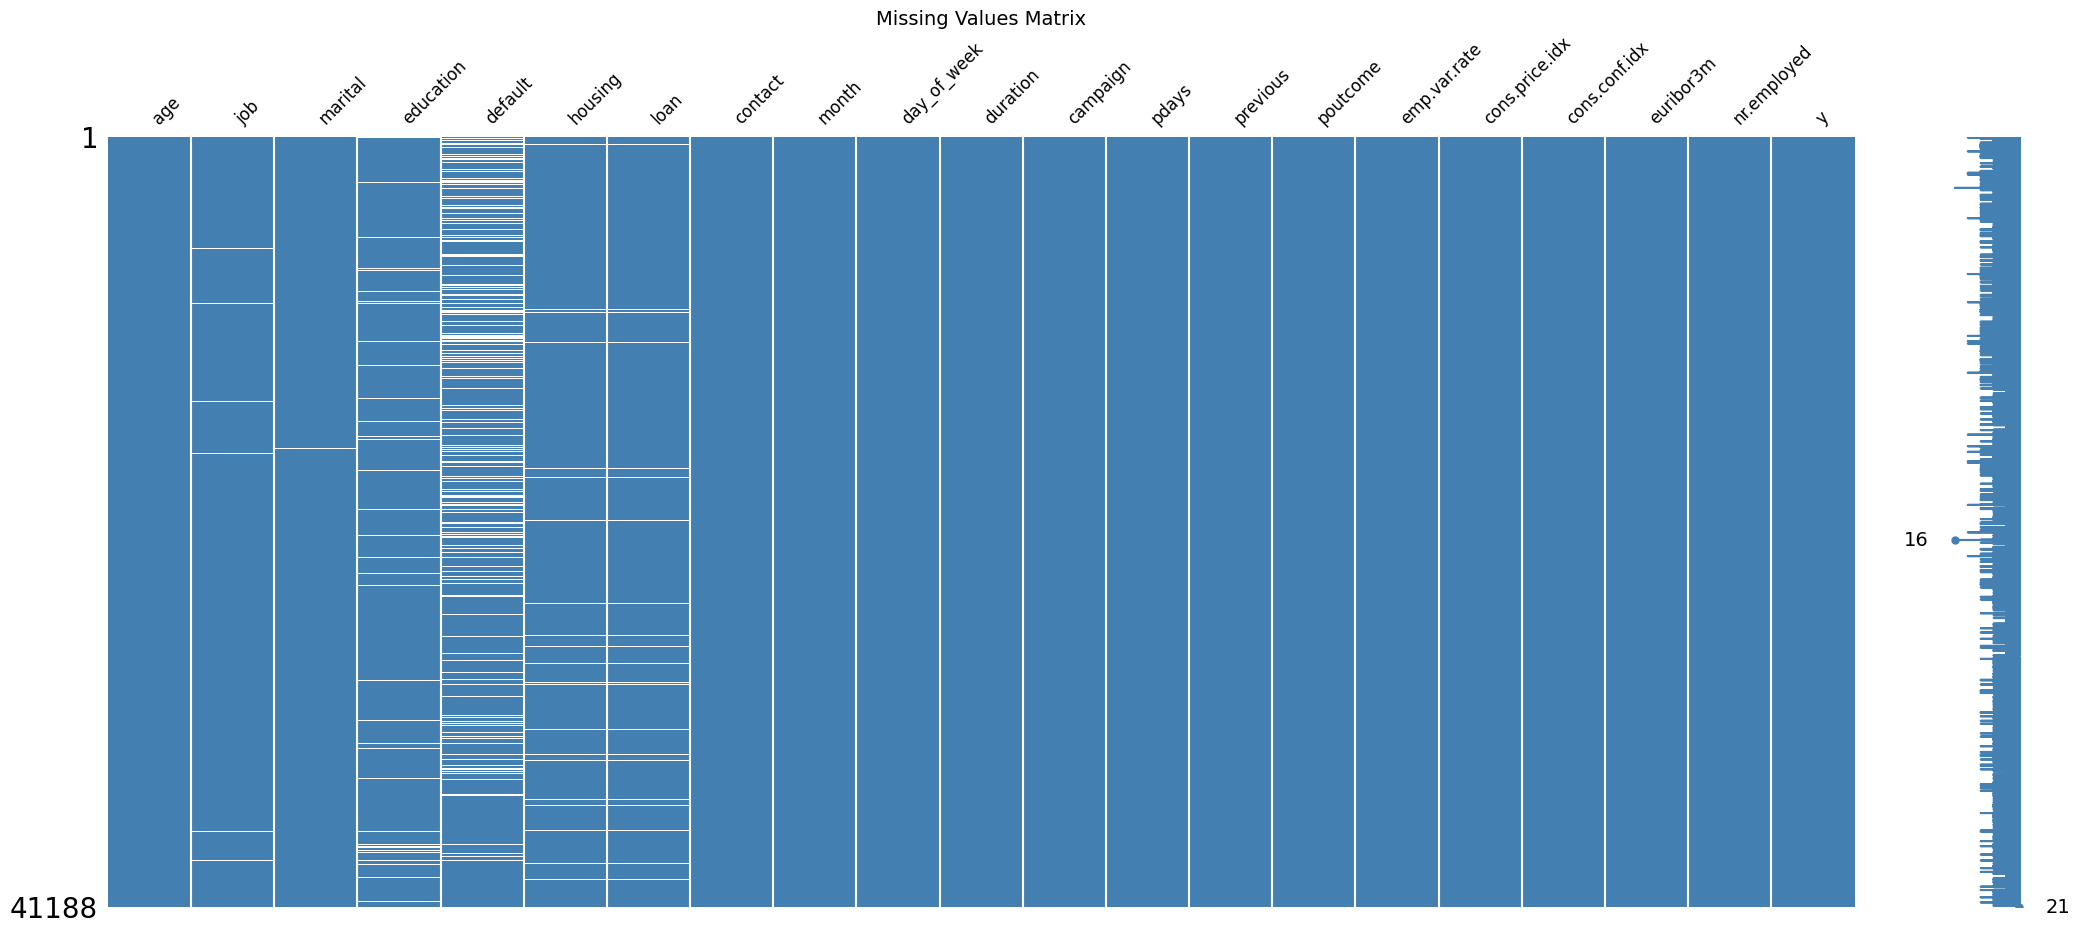

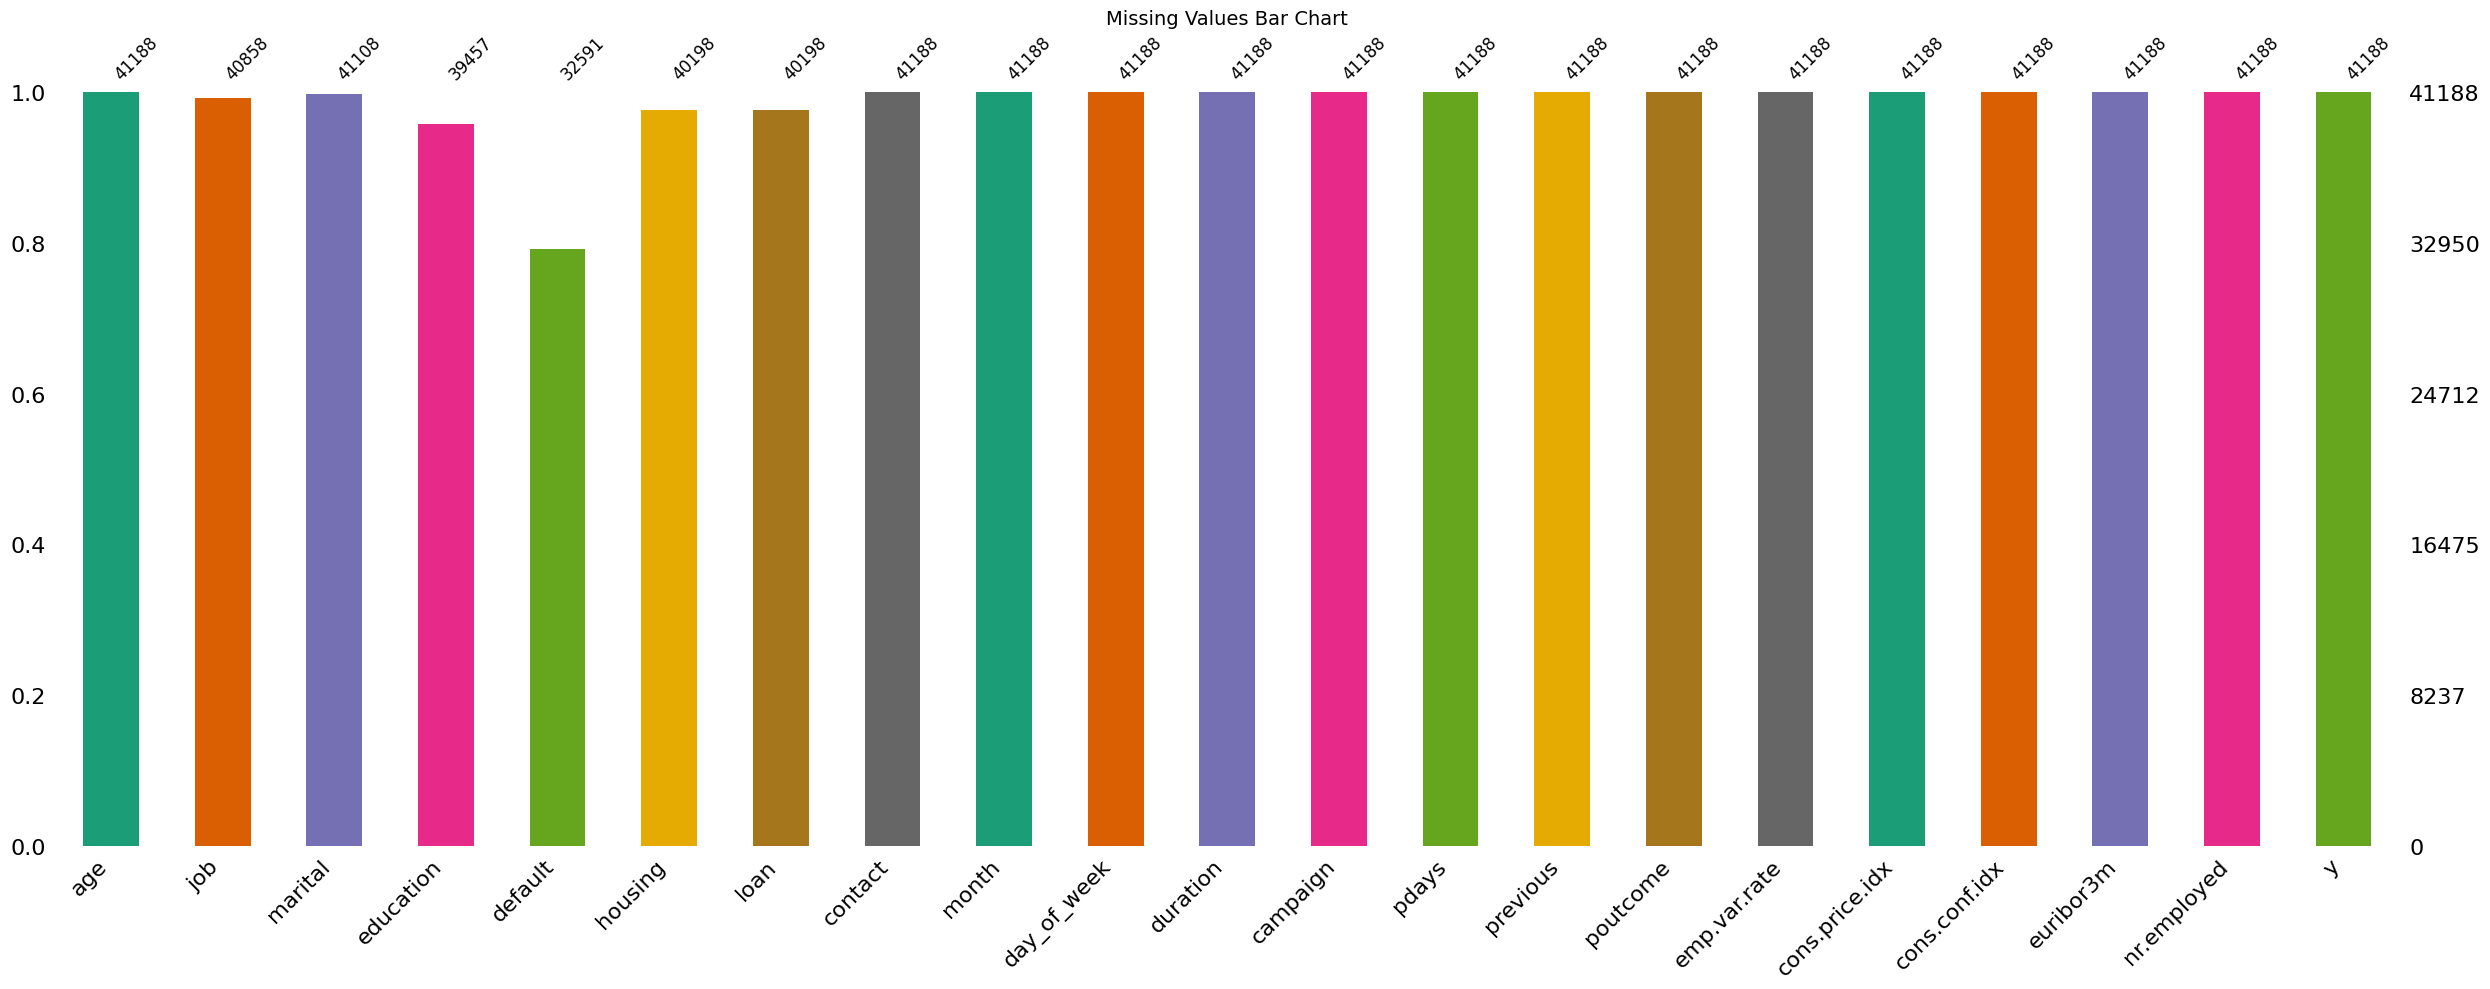

In [ ]:
missing_inf_values(data)
print(f"\nNumber of duplicate rows: {data.duplicated().sum()}\n")
duplicates = data[data.duplicated()]
duplicates
show_missing(data)

In [ ]:
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    if data[col].isna().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)
print(f"\nNumber of duplicate rows: {data.duplicated().sum()}\n")
duplicates = data[data.duplicated()]


Number of duplicate rows: 14



In [ ]:
data = data.drop_duplicates()

In [ ]:
missing_inf_values(data)

Missing Values Summary:
No missing values found.

Infinite Values Summary:
No infinite values found.


In [ ]:
inf_counts = np.isinf(data.select_dtypes(include=[np.number])).sum().sum()
print(f"Total Inf values: {inf_counts}")

Total Inf values: 0


In [ ]:
data.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [ ]:
columns_info("Dataset Overview", data)


======== Dataset Overview: ===========

Index Col Index  Attribute                      Data Type       Range                          Distinct Count
----- ---------- ------------------------------ --------------- ------------------------------ ---------------
1     15         emp.var.rate                   float64         -3.4 - 1.4                     10
2     16         cons.price.idx                 float64         92.201 - 94.767                26
3     17         cons.conf.idx                  float64         -50.8 - -26.9                  26
4     18         euribor3m                      float64         0.634 - 5.045                  316
5     19         nr.employed                    float64         4963.6 - 5228.1                11
6     0          age                            int64           17 - 98                        78
7     10         duration                       int64           0 - 4918                       1544
8     11         campaign                       i

In [ ]:
analyze_data(data)





















=== Numerical Analysis ===
|    | Variable       |     N |      Mean |       SD |     SE |   95% Conf. |   Interval |
|---:|:---------------|------:|----------:|---------:|-------:|------------:|-----------:|
|  0 | age            | 41174 |   40.0236 |  10.4206 | 0.0514 |     39.9229 |    40.1242 |
|  1 | duration       | 41174 |  258.324  | 259.309  | 1.2779 |    255.819  |   260.828  |
|  2 | campaign       | 41174 |    2.568  |   2.7704 | 0.0137 |      2.5412 |     2.5947 |
|  3 | pdays          | 41174 |  962.463  | 186.941  | 0.9213 |    960.657  |   964.269  |
|  4 | previous       | 41174 |    0.173  |   0.495  | 0.0024 |      0.1682 |     0.1778 |
|  5 | emp.var.rate   | 41174 |    0.0819 |   1.5709 | 0.0077 |      0.0667 |     0.097  |
|  6 | cons.price.idx | 41174 |   93.5757 |   0.5788 | 0.0029 |     93.5701 |    93.5813 |
|  7 | cons.conf.idx  | 41174 |  -40.5031 |   4.6279 | 0.0228 |    -40.5478 |   -40.4584 |
|  8 | euribor3m      | 41174 |    3.6212 |

In [ ]:
data_cat_missing_summary, data_cat_non_missing_summary = comp_cat_analysis(data, missing_df=True)
data_num_missing_summary, data_num_non_missing_summary = comp_num_analysis(data, missing_df=True)
data_outlier_summary, data_non_outlier_summary = comp_num_analysis(data, outlier_df=True)
print(data_cat_missing_summary.shape)
print(data_num_missing_summary.shape)
print(data_outlier_summary.shape)

(0, 9)
(0, 31)
(6, 31)


In [ ]:
data_cat_missing_summary

Empty DataFrame
Columns: [Index, Column, DataType, Count, Missing_Percentage, Unique_Count, Mode, Mode Frequency, Mode %]
Index: []

In [ ]:
data_cat_non_missing_summary

Index       Column DataType  Count  Missing_Percentage  Unique_Count  \
6       7      contact   object  41174                 0.0             2   
8       9  day_of_week   object  41174                 0.0             5   
3       4      default   object  41174                 0.0             2   
2       3    education   object  41174                 0.0             7   
4       5      housing   object  41174                 0.0             2   
0       1          job   object  41174                 0.0            11   
5       6         loan   object  41174                 0.0             2   
1       2      marital   object  41174                 0.0             3   
7       8        month   object  41174                 0.0            10   
9      14     poutcome   object  41174                 0.0             3   
10     20            y   object  41174                 0.0             2   

                 Mode  Mode Frequency     Mode %  
6            cellular           26134  63.472094  
8                 thu            8617  20.928256  
3                  no           41171  99.992714  
2   university.degree           13893  33.742167  
4                 yes           22560  54.791859  
0              admin.           10748  26.103852  
5                  no           34926  84.825375  
1             married           24999  60.715500  
7                 may           13766  33.433720  
9         nonexistent           35549  86.338466  
10                 no           36535  88.733181

In [ ]:
data_num_non_missing_summary

Index          Column DataType  Count  Missing_Percentage  Unique_Count  \
0      0             age    int64  41174                 0.0            78   
1     10        duration    int64  41174                 0.0          1544   
2     11        campaign    int64  41174                 0.0            42   
3     12           pdays    int64  41174                 0.0            27   
4     13        previous    int64  41174                 0.0             8   
5     15    emp.var.rate  float64  41174                 0.0            10   
6     16  cons.price.idx  float64  41174                 0.0            26   
7     17   cons.conf.idx  float64  41174                 0.0            26   
8     18       euribor3m  float64  41174                 0.0           316   
9     19     nr.employed  float64  41174                 0.0            11   

        Min        Q1  50% (Median)        Q3       Max      Mode     Range  \
0    17.000    32.000        38.000    47.000    98.000    31.000    81.000   
1     0.000   102.000       180.000   319.000  4918.000    85.000  4918.000   
2     1.000     1.000         2.000     3.000    56.000     1.000    55.000   
3     0.000   999.000       999.000   999.000   999.000   999.000   999.000   
4     0.000     0.000         0.000     0.000     7.000     0.000     7.000   
5    -3.400    -1.800         1.100     1.400     1.400     1.400     4.800   
6    92.201    93.075        93.749    93.994    94.767    93.994     2.566   
7   -50.800   -42.700       -41.800   -36.400   -26.900   -36.400    23.900   
8     0.634     1.344         4.857     4.961     5.045     4.857     4.411   
9  4963.600  5099.100      5191.000  5228.100  5228.100  5228.100   264.500   

       IQR  Lower Bound  Upper Bound  Total Distinct  Outliers Distinct  \
0   15.000       9.5000      69.5000              78                 25   
1  217.000    -223.5000     644.5000            1544                899   
2    2.000      -2.0000       6.0000              42                 36   
3    0.000     999.0000     999.0000              27                 26   
4    0.000       0.0000       0.0000               8                  7   
5    3.200      -6.6000       6.2000              10                  0   
6    0.919      91.6965      95.3725              26                  0   
7    6.300     -52.1500     -26.9500              26                  1   
8    3.617      -4.0815      10.3865             316                  0   
9  129.000    4905.6000    5421.6000              11                  0   

   Outliers Count  Outliers %  Negative Count  Negative Distinct  Negative %  \
0             468    1.136640               0                  0    0.000000   
1            2963    7.196289               0                  0    0.000000   
2            2406    5.843493               0                  0    0.000000   
3            1515    3.679506               0                  0    0.000000   
4            5625   13.661534               0                  0    0.000000   
5               0    0.000000           17186                  8   41.739933   
6               0    0.000000               0                  0    0.000000   
7             446    1.083208           41174                 26  100.000000   
8               0    0.000000               0                  0    0.000000   
9               0    0.000000               0                  0    0.000000   

          Mean      Variance         Std  Skewness   Kurtosis  \
0    40.023583    108.588446   10.420578  0.784575   0.791130   
1   258.323627  67241.187348  259.309058  3.262629  20.240554   
2     2.567956      7.674917    2.770364  4.761792  36.965996   
3   962.463035  34947.112652  186.941469 -4.921073  22.217391   
4     0.173022      0.245000    0.494975  3.831148  20.098468   
5     0.081865      2.467725    1.570899 -0.723959  -1.062824   
6    93.575713      0.335066    0.578849 -0.230817  -0.829959   
7   -40.503070     21.417248    4.627877  0.302

In [ ]:
data_non_outlier_summary

Index          Column DataType  Count  Missing_Percentage  Unique_Count  \
5     15    emp.var.rate  float64  41174                 0.0            10   
6     16  cons.price.idx  float64  41174                 0.0            26   
8     18       euribor3m  float64  41174                 0.0           316   
9     19     nr.employed  float64  41174                 0.0            11   

        Min        Q1  50% (Median)        Q3       Max      Mode    Range  \
5    -3.400    -1.800         1.100     1.400     1.400     1.400    4.800   
6    92.201    93.075        93.749    93.994    94.767    93.994    2.566   
8     0.634     1.344         4.857     4.961     5.045     4.857    4.411   
9  4963.600  5099.100      5191.000  5228.100  5228.100  5228.100  264.500   

       IQR  Lower Bound  Upper Bound  Total Distinct  Outliers Distinct  \
5    3.200      -6.6000       6.2000              10                  0   
6    0.919      91.6965      95.3725              26                  0   
8    3.617      -4.0815      10.3865             316                  0   
9  129.000    4905.6000    5421.6000              11                  0   

   Outliers Count  Outliers %  Negative Count  Negative Distinct  Negative %  \
5               0         0.0           17186                  8   41.739933   
6               0         0.0               0                  0    0.000000   
8               0         0.0               0                  0    0.000000   
9               0         0.0               0                  0    0.000000   

          Mean     Variance        Std  Skewness  Kurtosis  \
5     0.081865     2.467725   1.570899 -0.723959 -1.062824   
6    93.575713     0.335066   0.578849 -0.230817 -0.829959   
8     3.621231     3.008337   1.734456 -0.709092 -1.406875   
9  5167.032805  5220.408652  72.252395 -1.044215 -0.003843   

       Normality Test  Normality Statistic  Normality p-value  
5  Kolmogorov-Smirnov             0.324148                0.0  
6  Kolmogorov-Smirnov             0.214032                0.0  
8  Kolmogorov-Smirnov             0.345472                0.0  
9  Kolmogorov-Smirnov             0.301974                0.0

In [ ]:
data_outlier_summary

Index         Column DataType  Count  Missing_Percentage  Unique_Count  \
0      0            age    int64  41174                 0.0            78   
3     12          pdays    int64  41174                 0.0            27   
2     11       campaign    int64  41174                 0.0            42   
1     10       duration    int64  41174                 0.0          1544   
4     13       previous    int64  41174                 0.0             8   
7     17  cons.conf.idx  float64  41174                 0.0            26   

    Min     Q1  50% (Median)     Q3     Max   Mode   Range    IQR  \
0  17.0   32.0          38.0   47.0    98.0   31.0    81.0   15.0   
3   0.0  999.0         999.0  999.0   999.0  999.0   999.0    0.0   
2   1.0    1.0           2.0    3.0    56.0    1.0    55.0    2.0   
1   0.0  102.0         180.0  319.0  4918.0   85.0  4918.0  217.0   
4   0.0    0.0           0.0    0.0     7.0    0.0     7.0    0.0   
7 -50.8  -42.7         -41.8  -36.4   -26.9  -36.4    23.9    6.3   

   Lower Bound  Upper Bound  Total Distinct  Outliers Distinct  \
0         9.50        69.50              78                 25   
3       999.00       999.00              27                 26   
2        -2.00         6.00              42                 36   
1      -223.50       644.50            1544                899   
4         0.00         0.00               8                  7   
7       -52.15       -26.95              26                  1   

   Outliers Count  Outliers %  Negative Count  Negative Distinct  Negative %  \
0             468    1.136640               0                  0         0.0   
3            1515    3.679506               0                  0         0.0   
2            2406    5.843493               0                  0         0.0   
1            2963    7.196289               0                  0         0.0   
4            5625   13.661534               0                  0         0.0   
7             446    1.083208           41174                 26       100.0   

         Mean      Variance         Std  Skewness   Kurtosis  \
0   40.023583    108.588446   10.420578  0.784575   0.791130   
3  962.463035  34947.112652  186.941469 -4.921073  22.217391   
2    2.567956      7.674917    2.770364  4.761792  36.965996   
1  258.323627  67241.187348  259.309058  3.262629  20.240554   
4    0.173022      0.245000    0.494975  3.831148  20.098468   
7  -40.503070     21.417248    4.627877  0.302972  -0.359091   

       Normality Test  Normality Statistic  Normality p-value  
0  Kolmogorov-Smirnov             0.094435      5.032553e-320  
3  Kolmogorov-Smirnov             0.540683       0.000000e+00  
2  Kolmogorov-Smirnov             0.285706       0.000000e+00  
1  Kolmogorov-Smirnov             0.169505       0.000000e+00  
4  Kolmogorov-Smirnov             0.500049       0.000000e+00  
7  Kolmogorov-Smirnov             0.190261       0.000000e+00

In [ ]:
data_negative_values = data.select_dtypes(include=[np.number]).lt(0).sum()
data_negative_values = data_negative_values[data_negative_values > 0].sort_values(ascending=False)
print("Columns with Negative Values (Sorted):\n", data_negative_values)

Columns with Negative Values (Sorted):
 cons.conf.idx    41174
emp.var.rate     17186
dtype: int64


Exploratory Data Analysis (EDA)


Value counts and percentages for Y:

| Y   |   Count |   % Total |
|:----|--------:|----------:|
| no  |   36535 |     88.73 |
| yes |    4639 |     11.27 |


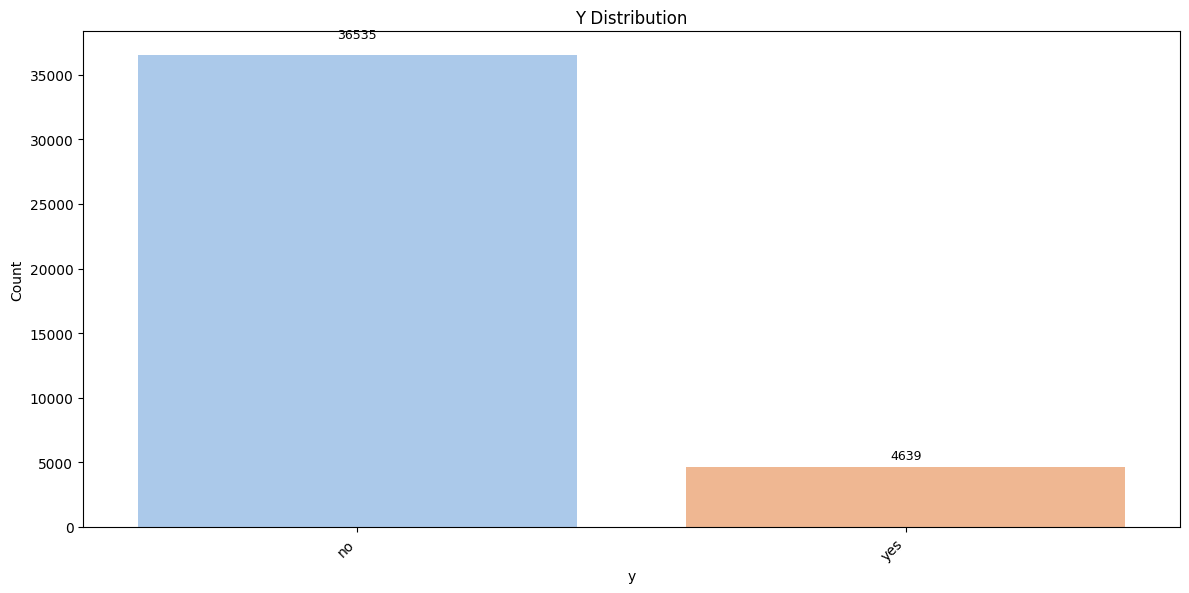

In [ ]:
cat_analyze_and_plot(data, 'y')

In [ ]:
grouped_summary(data, groupby='y')

=== Summary Grouped by 'y' ===


Grouped by y                                                     
                                                   Missing        Overall             no            yes P-Value
n                                                                   41174          36535           4639        
age, mean (SD)                                           0    40.0 (10.4)     39.9 (9.9)    40.9 (13.8)  <0.001
job, n (%)                admin.                             10748 (26.1)    9360 (25.6)    1388 (29.9)  <0.001
                          blue-collar                         9252 (22.5)    8614 (23.6)     638 (13.8)        
                          entrepreneur                         1456 (3.5)     1332 (3.6)      124 (2.7)        
                          housemaid                            1060 (2.6)      954 (2.6)      106 (2.3)        
                          management                           2924 (7.1)     2596 (7.1)      328 (7.1)        
                          retired                              1718 (4.2)     1284 (3.5)      434 (9.4)        
                          self-employed                        1421 (3.5)     1272 (3.5)      149 (3.2)        
                          services                             3967 (9.6)    3644 (10.0)      323 (7.0)        
                          student                               875 (2.1)      600 (1.6)      275 (5.9)        
                          technician                          6739 (16.4)    6009 (16.4)     730 (15.7)        
                          unemployed                           1014 (2.5)      870 (2.4)      144 (3.1)        
marital, n (%)            divorced                            4611 (11.2)    4135 (11.3)     476 (10.3)  <0.001
                          married                            24999 (60.7)   22456 (61.5)    2543 (54.8)        
                          single                             11564 (28.1)    9944 (27.2)    1620 (34.9)        
education, n (%)          basic.4y                            4175 (10.1)    3747 (10.3)      428 (9.2)  <0.001
                          basic.6y                             2291 (5.6)     2103 (5.8)      188 (4.1)        
                          basic.9y                            6045 (14.7)    5572 (15.3)     473 (10.2)        
                          high.school                         9512 (23.1)    8481 (23.2)    1031 (22.2)        
                          illiterate                             18 (0.0)       14 (0.0)        4 (0.1)        
                          professional.course                 5240 (12.7)    4645 (12.7)     595 (12.8)        
                          university.degree                  13893 (33.7)   11973 (32.8)    1920 (41.4)        
default, n (%)            no                                41171 (100.0)  36532 (100.0)   4639 (100.0)   1.000
                          yes                                     3 (0.0)        3 (0.0)        0 (0.0)        
housing, n (%)            no                                 18614 (45.2)   16589 (45.4)    2025 (43.7)   0.025
                          yes                                22560 (54.8)   19946 (54.6)    2614 (56.3)        
loan, n (%)               no                                 34926 (84.8)   30970 (84.8)    3956 (85.3)   0.374
                          yes                                 6248 (15.2)    5565 (15.2)     683 (14.7)        
contact, n (%)            cellular                           26134 (63.5)   22282 (61.0)    3852 (83.0)  <0.001
                          telephone                          15040 (36.5)   14253 (39.0)     787 (17.0)        
month, n (%)              apr                                  2631 (6.4)     2092 (5.7)     539 (11.6)  <0.001
                          aug                                 6175 (15.0)    5520 (15.1)     655 (14.1)        
                          dec                                   182 (0.4)       93 (0.3)       89 (1.9)        
              

In [ ]:
columns_info("Dataset Overview", data)


======== Dataset Overview: ===========

Index Col Index  Attribute                      Data Type       Range                          Distinct Count
----- ---------- ------------------------------ --------------- ------------------------------ ---------------
1     15         emp.var.rate                   float64         -3.4 - 1.4                     10
2     16         cons.price.idx                 float64         92.201 - 94.767                26
3     17         cons.conf.idx                  float64         -50.8 - -26.9                  26
4     18         euribor3m                      float64         0.634 - 5.045                  316
5     19         nr.employed                    float64         4963.6 - 5228.1                11
6     0          age                            int64           17 - 98                        78
7     10         duration                       int64           0 - 4918                       1544
8     11         campaign                       i

In [ ]:
num_summary(data)

Count  Unique       Mean       Std       Min       25%  \
age             41174.0    78.0    40.0236   10.4206    17.000    32.000   
duration        41174.0  1544.0   258.3236  259.3091     0.000   102.000   
campaign        41174.0    42.0     2.5680    2.7704     1.000     1.000   
pdays           41174.0    27.0   962.4630  186.9415     0.000   999.000   
previous        41174.0     8.0     0.1730    0.4950     0.000     0.000   
emp.var.rate    41174.0    10.0     0.0819    1.5709    -3.400    -1.800   
cons.price.idx  41174.0    26.0    93.5757    0.5788    92.201    93.075   
cons.conf.idx   41174.0    26.0   -40.5031    4.6279   -50.800   -42.700   
euribor3m       41174.0   316.0     3.6212    1.7345     0.634     1.344   
nr.employed     41174.0    11.0  5167.0328   72.2524  4963.600  5099.100   

                     50%       75%       Max      Mode     Range      IQR  \
age               38.000    47.000    98.000    31.000    81.000   15.000   
duration         180.000   319.000  4918.000    85.000  4918.000  217.000   
campaign           2.000     3.000    56.000     1.000    55.000    2.000   
pdays            999.000   999.000   999.000   999.000   999.000    0.000   
previous           0.000     0.000     7.000     0.000     7.000    0.000   
emp.var.rate       1.100     1.400     1.400     1.400     4.800    3.200   
cons.price.idx    93.749    93.994    94.767    93.994     2.566    0.919   
cons.conf.idx    -41.800   -36.400   -26.900   -36.400    23.900    6.300   
euribor3m          4.857     4.961     5.045     4.857     4.411    3.617   
nr.employed     5191.000  5228.100  5228.100  5228.100   264.500  129.000   

                  Variance  Skewness  Kurtosis  Shapiro-Wilk Stat  \
age               108.5884    0.7846    0.7914             0.9572   
duration        67241.1873    3.2627   20.2432             0.7217   
campaign            7.6749    4.7620   36.9706             0.5579   
pdays           34947.1127   -4.9213   22.2202             0.1830   
previous            0.2450    3.8313   20.1011             0.3913   
emp.var.rate        2.4677   -0.7240   -1.0628             0.7621   
cons.price.idx      0.3351   -0.2308   -0.8299             0.9340   
cons.conf.idx      21.4172    0.3030   -0.3590             0.9240   
euribor3m           3.0083   -0.7091   -1.4069             0.6863   
nr.employed      5220.4087   -1.0443   -0.0037             0.7876   

                Shapiro-Wilk p-value  
age                              0.0  
duration                         0.0  
campaign                         0.0  
pdays                            0.0  
previous                         0.0  
emp.var.rate                     0.0  
cons.price.idx                   0.0  
cons.conf.idx                    0.0  
euribor3m                        0.0  
nr.employed                      0.0

In [ ]:
cat_summary(data)

Count Unique                Top   Freq   Top %
job          41174     11             admin.  10748  26.10%
marital      41174      3            married  24999  60.72%
education    41174      7  university.degree  13893  33.74%
default      41174      2                 no  41171  99.99%
housing      41174      2                yes  22560  54.79%
loan         41174      2                 no  34926  84.83%
contact      41174      2           cellular  26134  63.47%
month        41174     10                may  13766  33.43%
day_of_week  41174      5                thu   8617  20.93%
poutcome     41174      3        nonexistent  35549  86.34%
y            41174      2                 no  36535  88.73%

Univariate Analysis

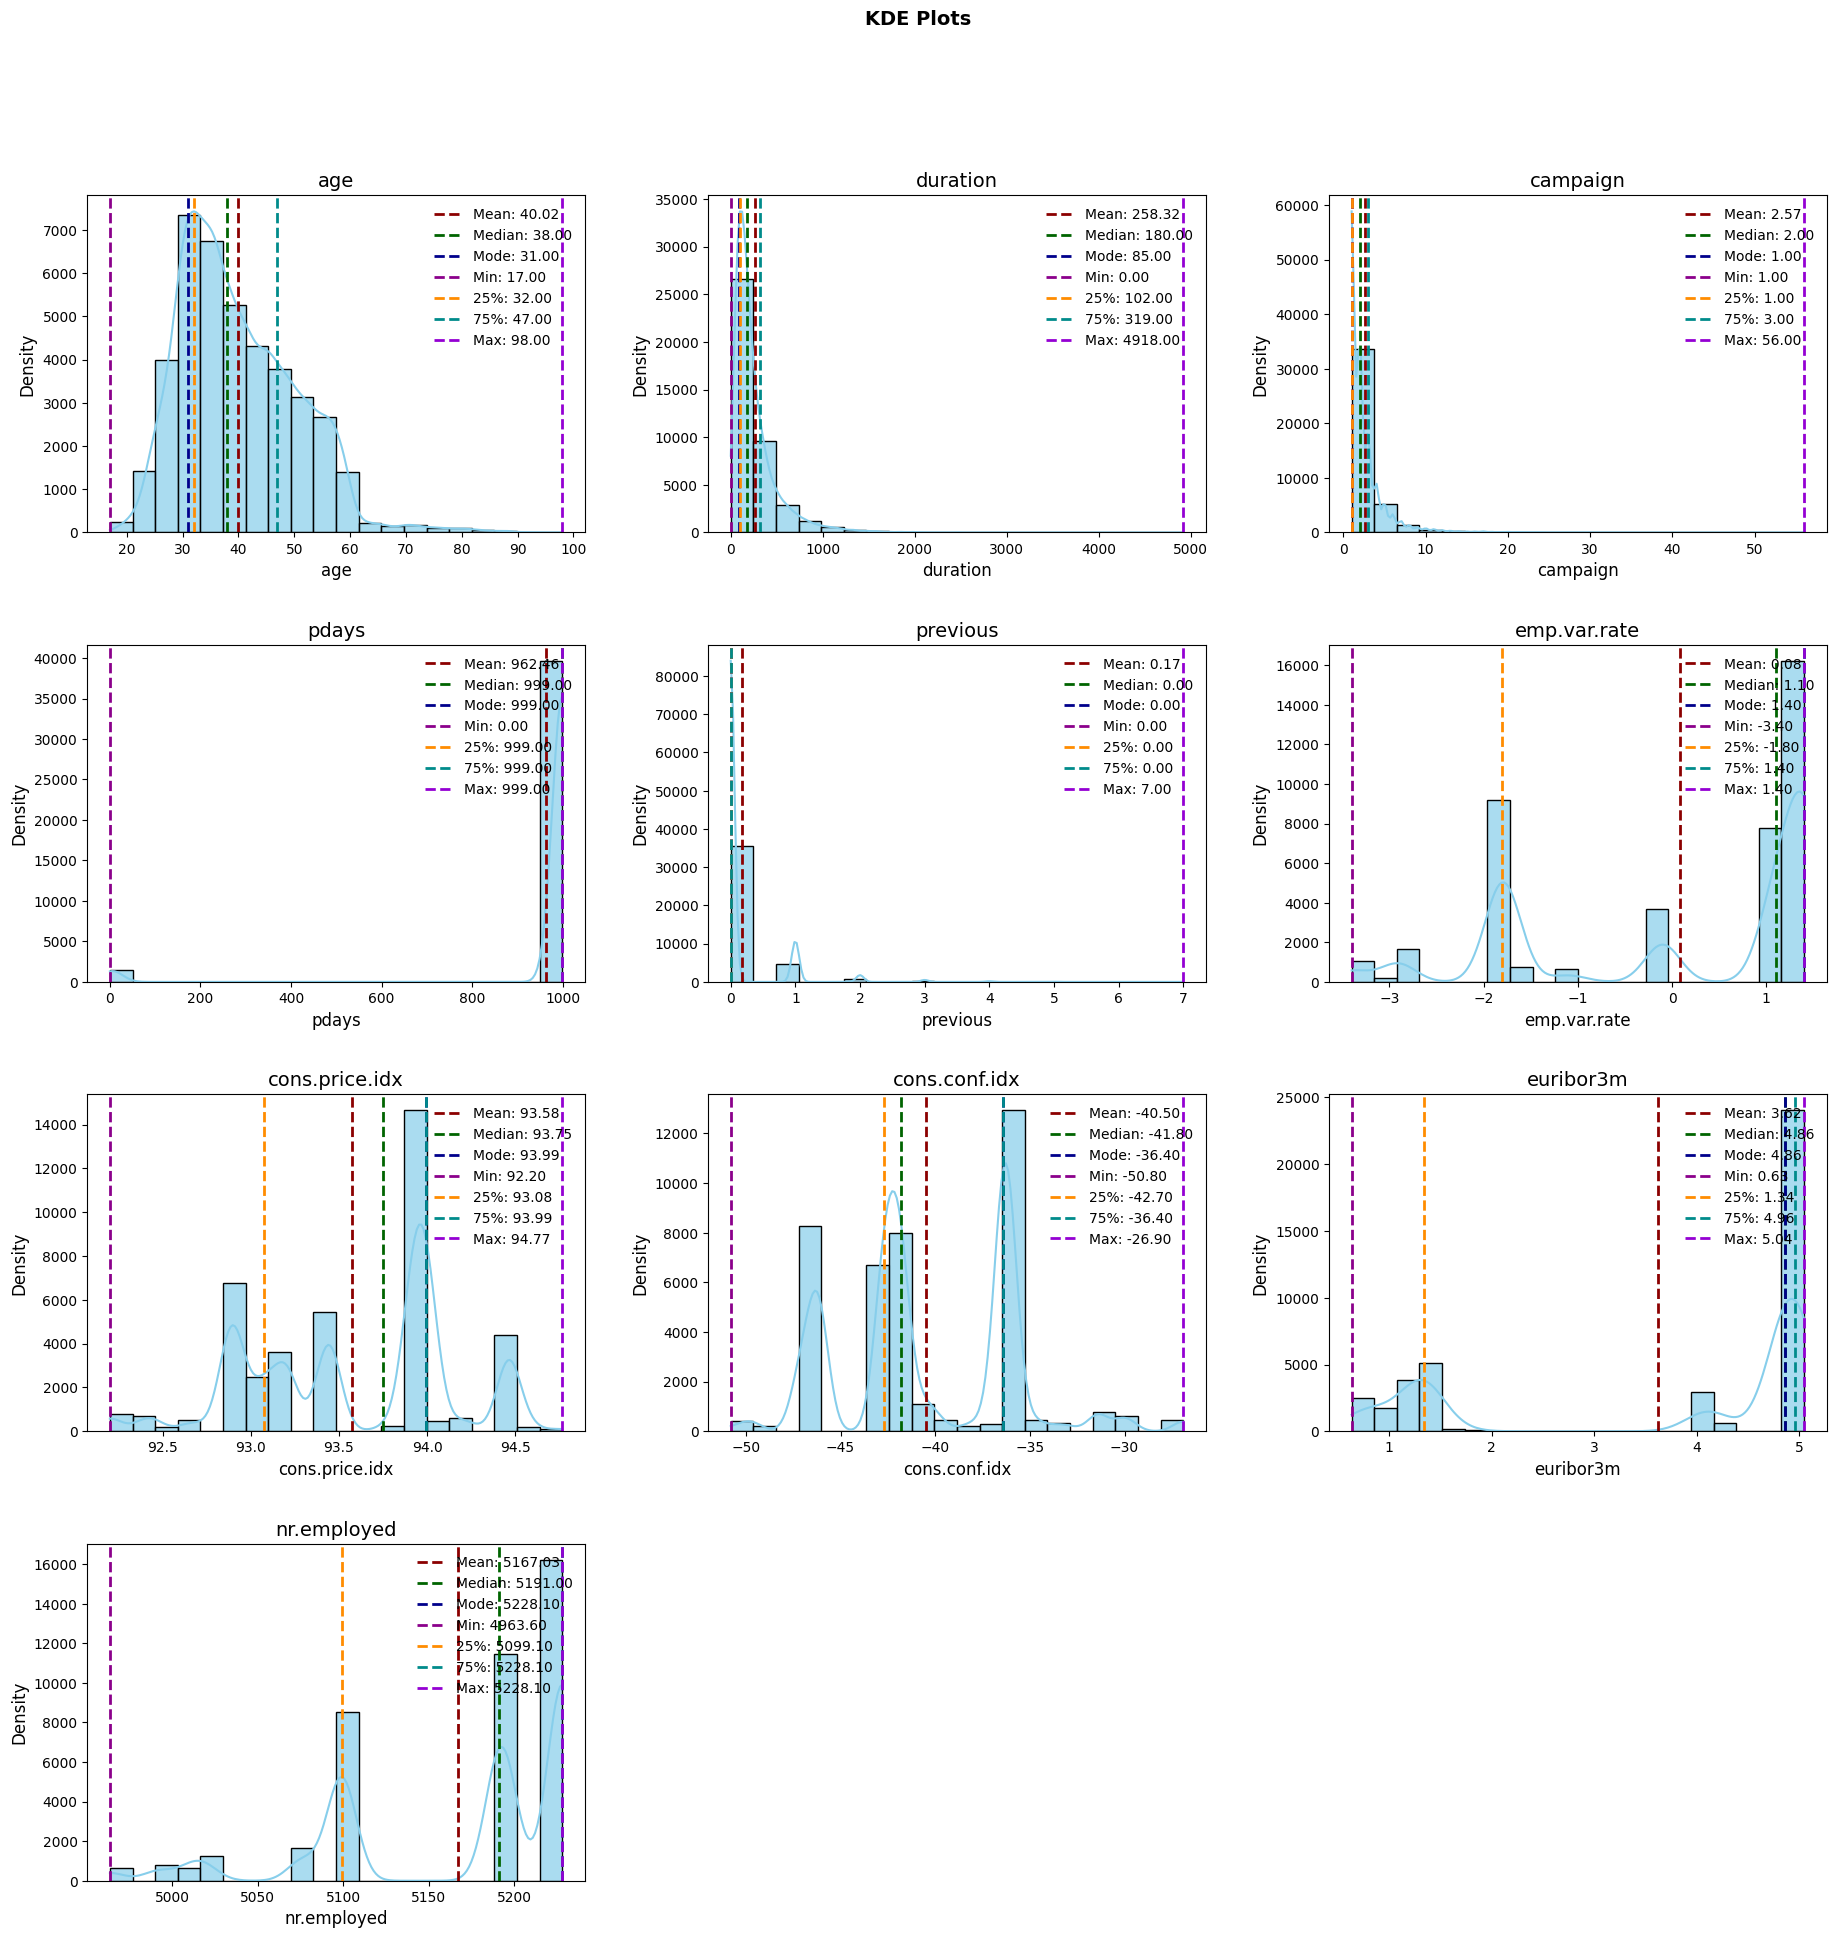

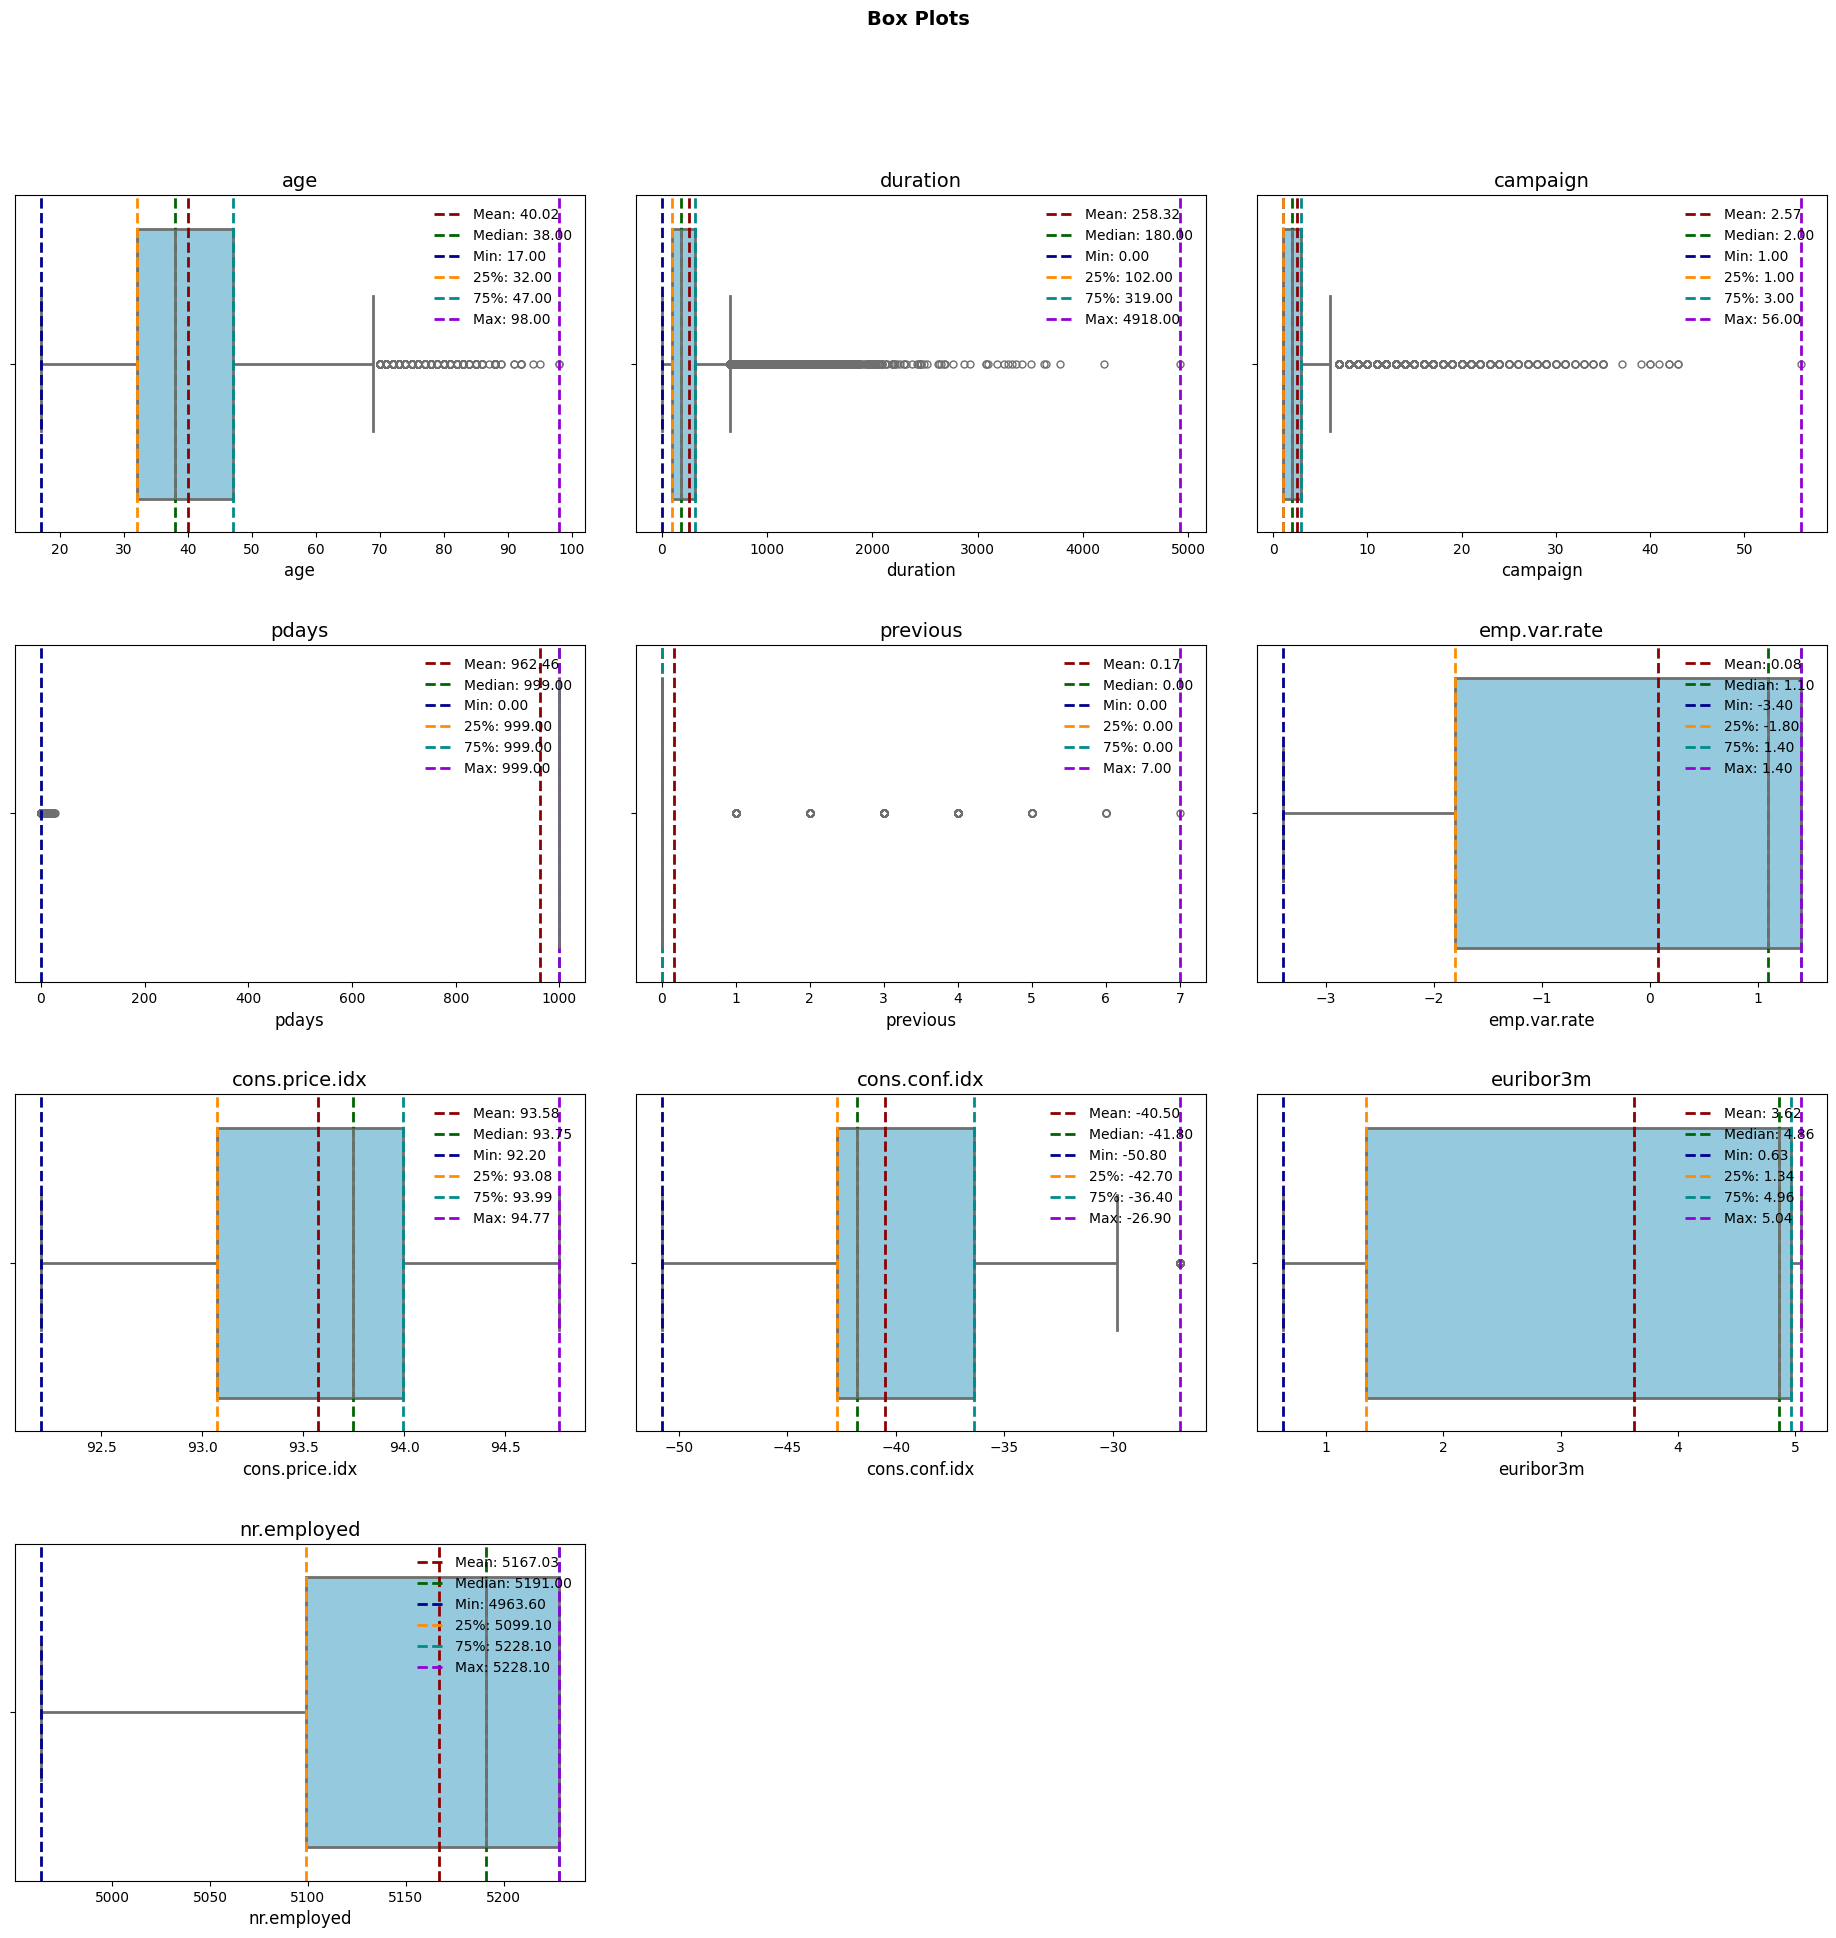

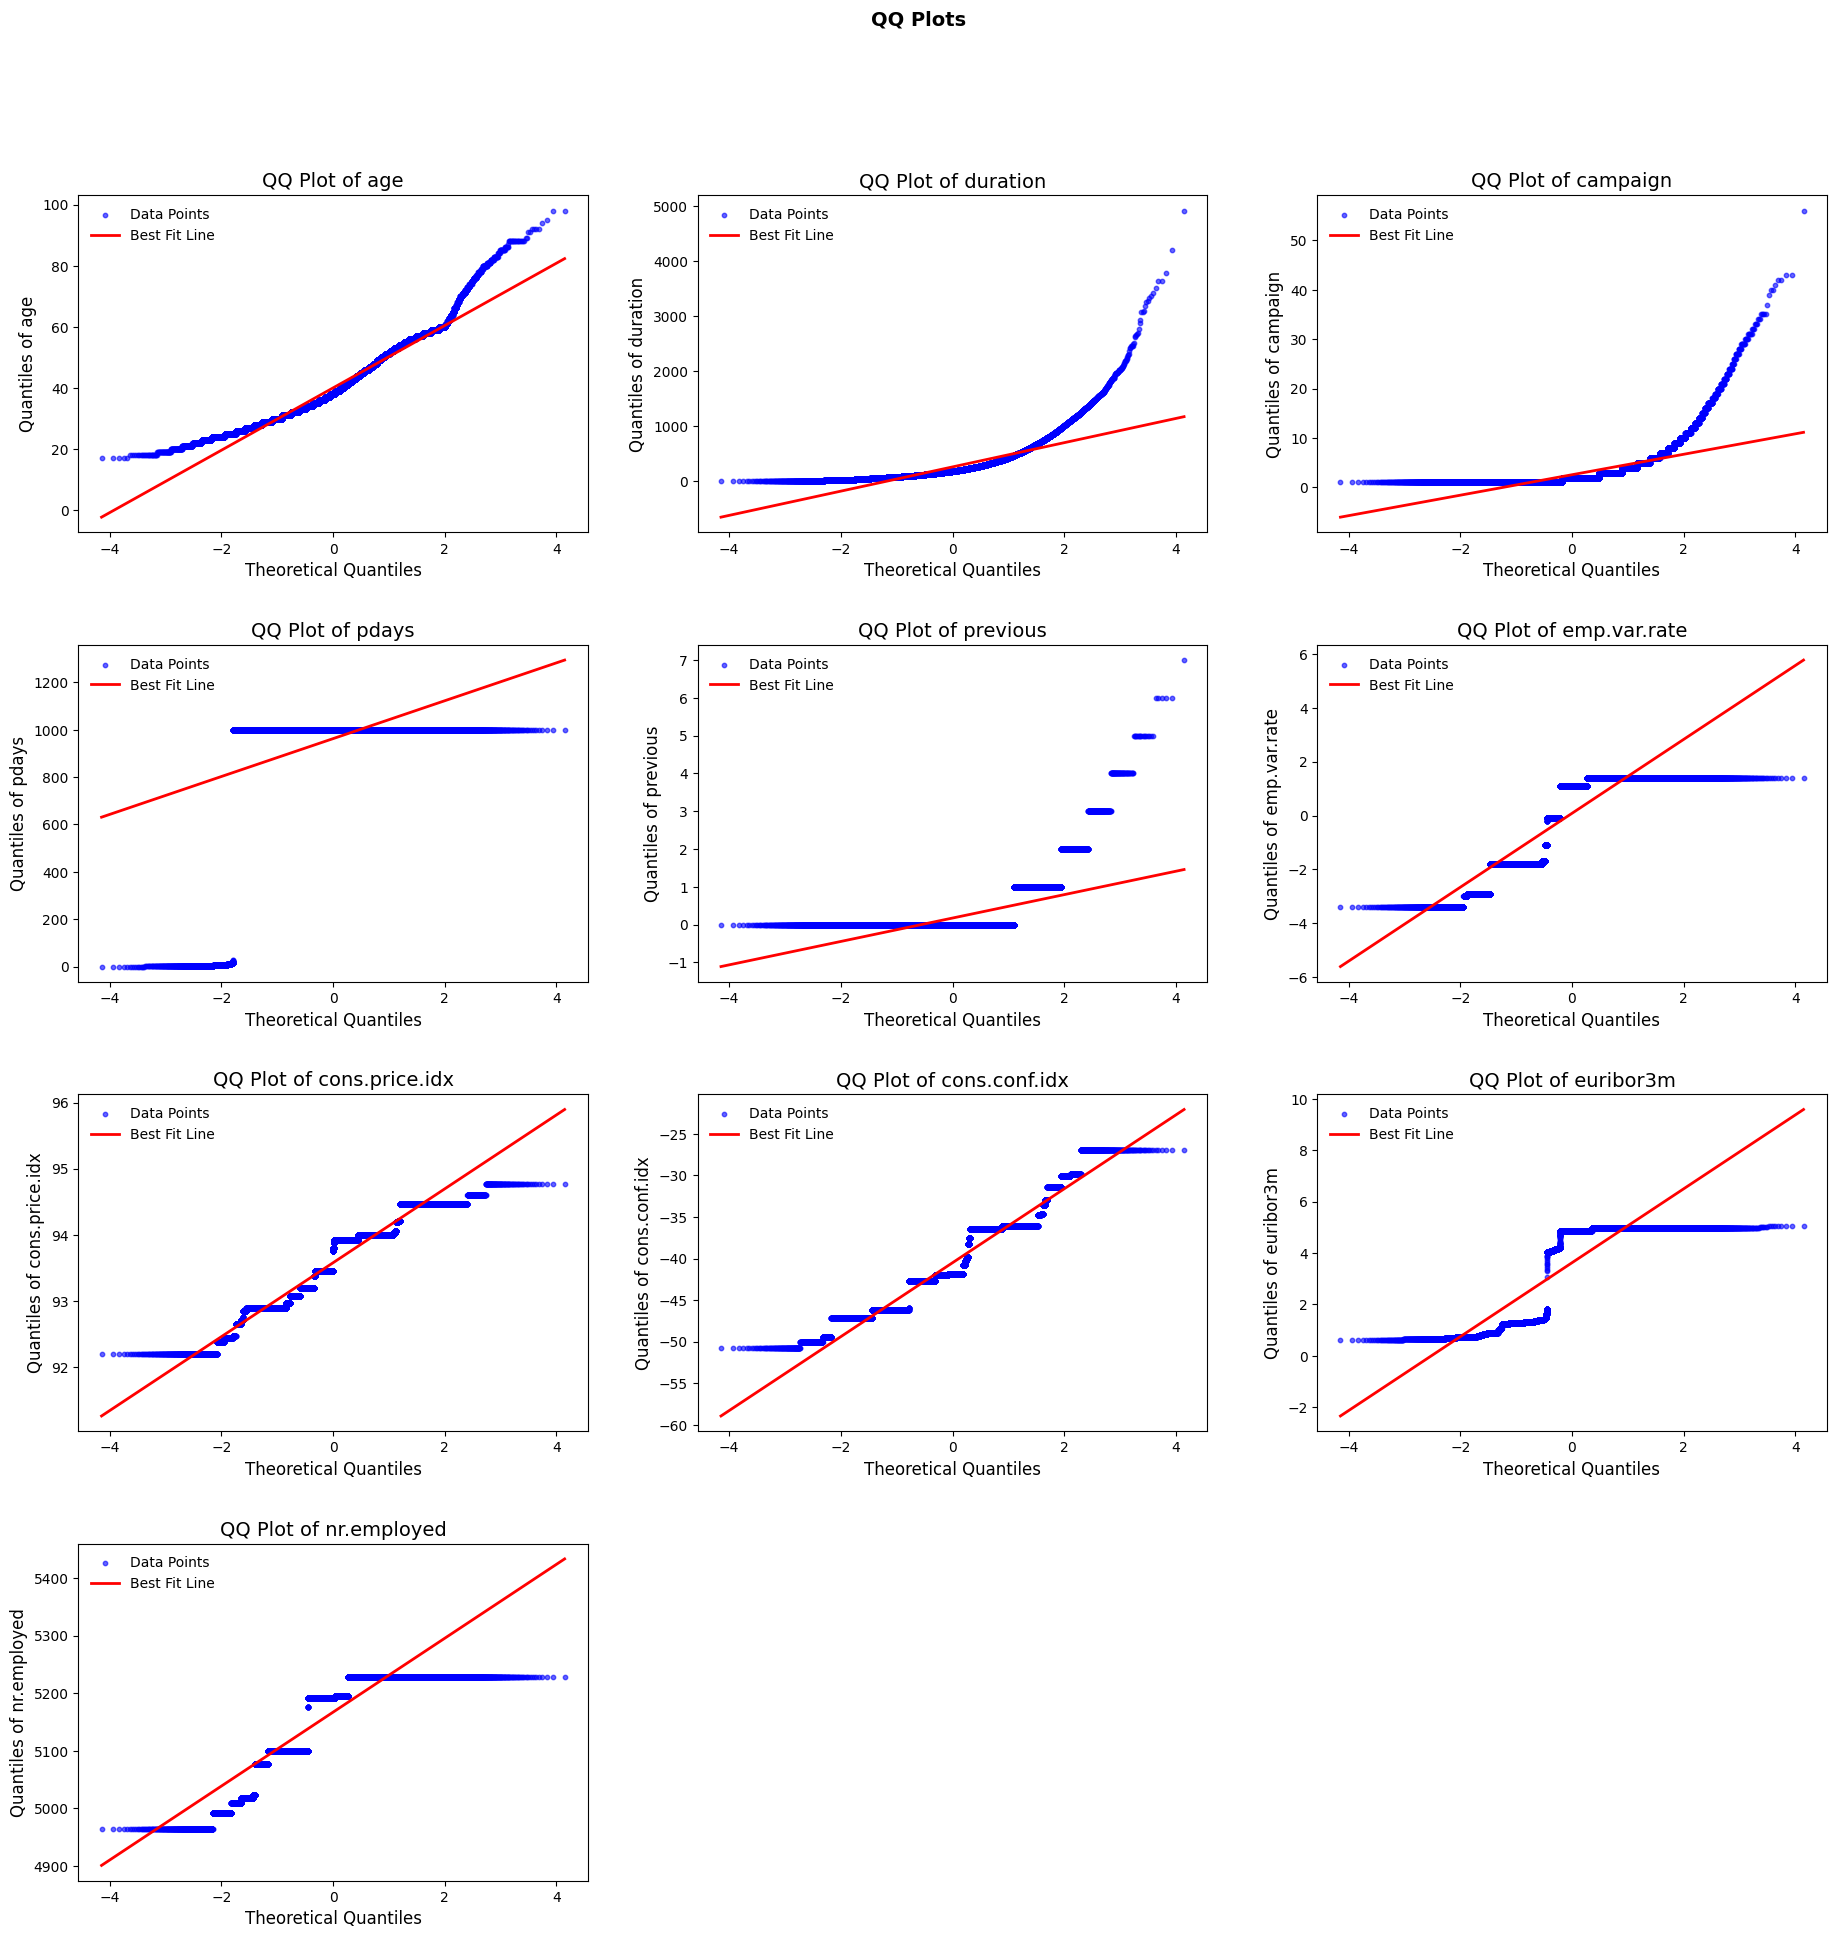

In [ ]:
kde_batches(data, batch_num=1)
box_plot_batches(data, batch_num=1)
qq_plot_batches(data, batch_num=1)

cat_analysis

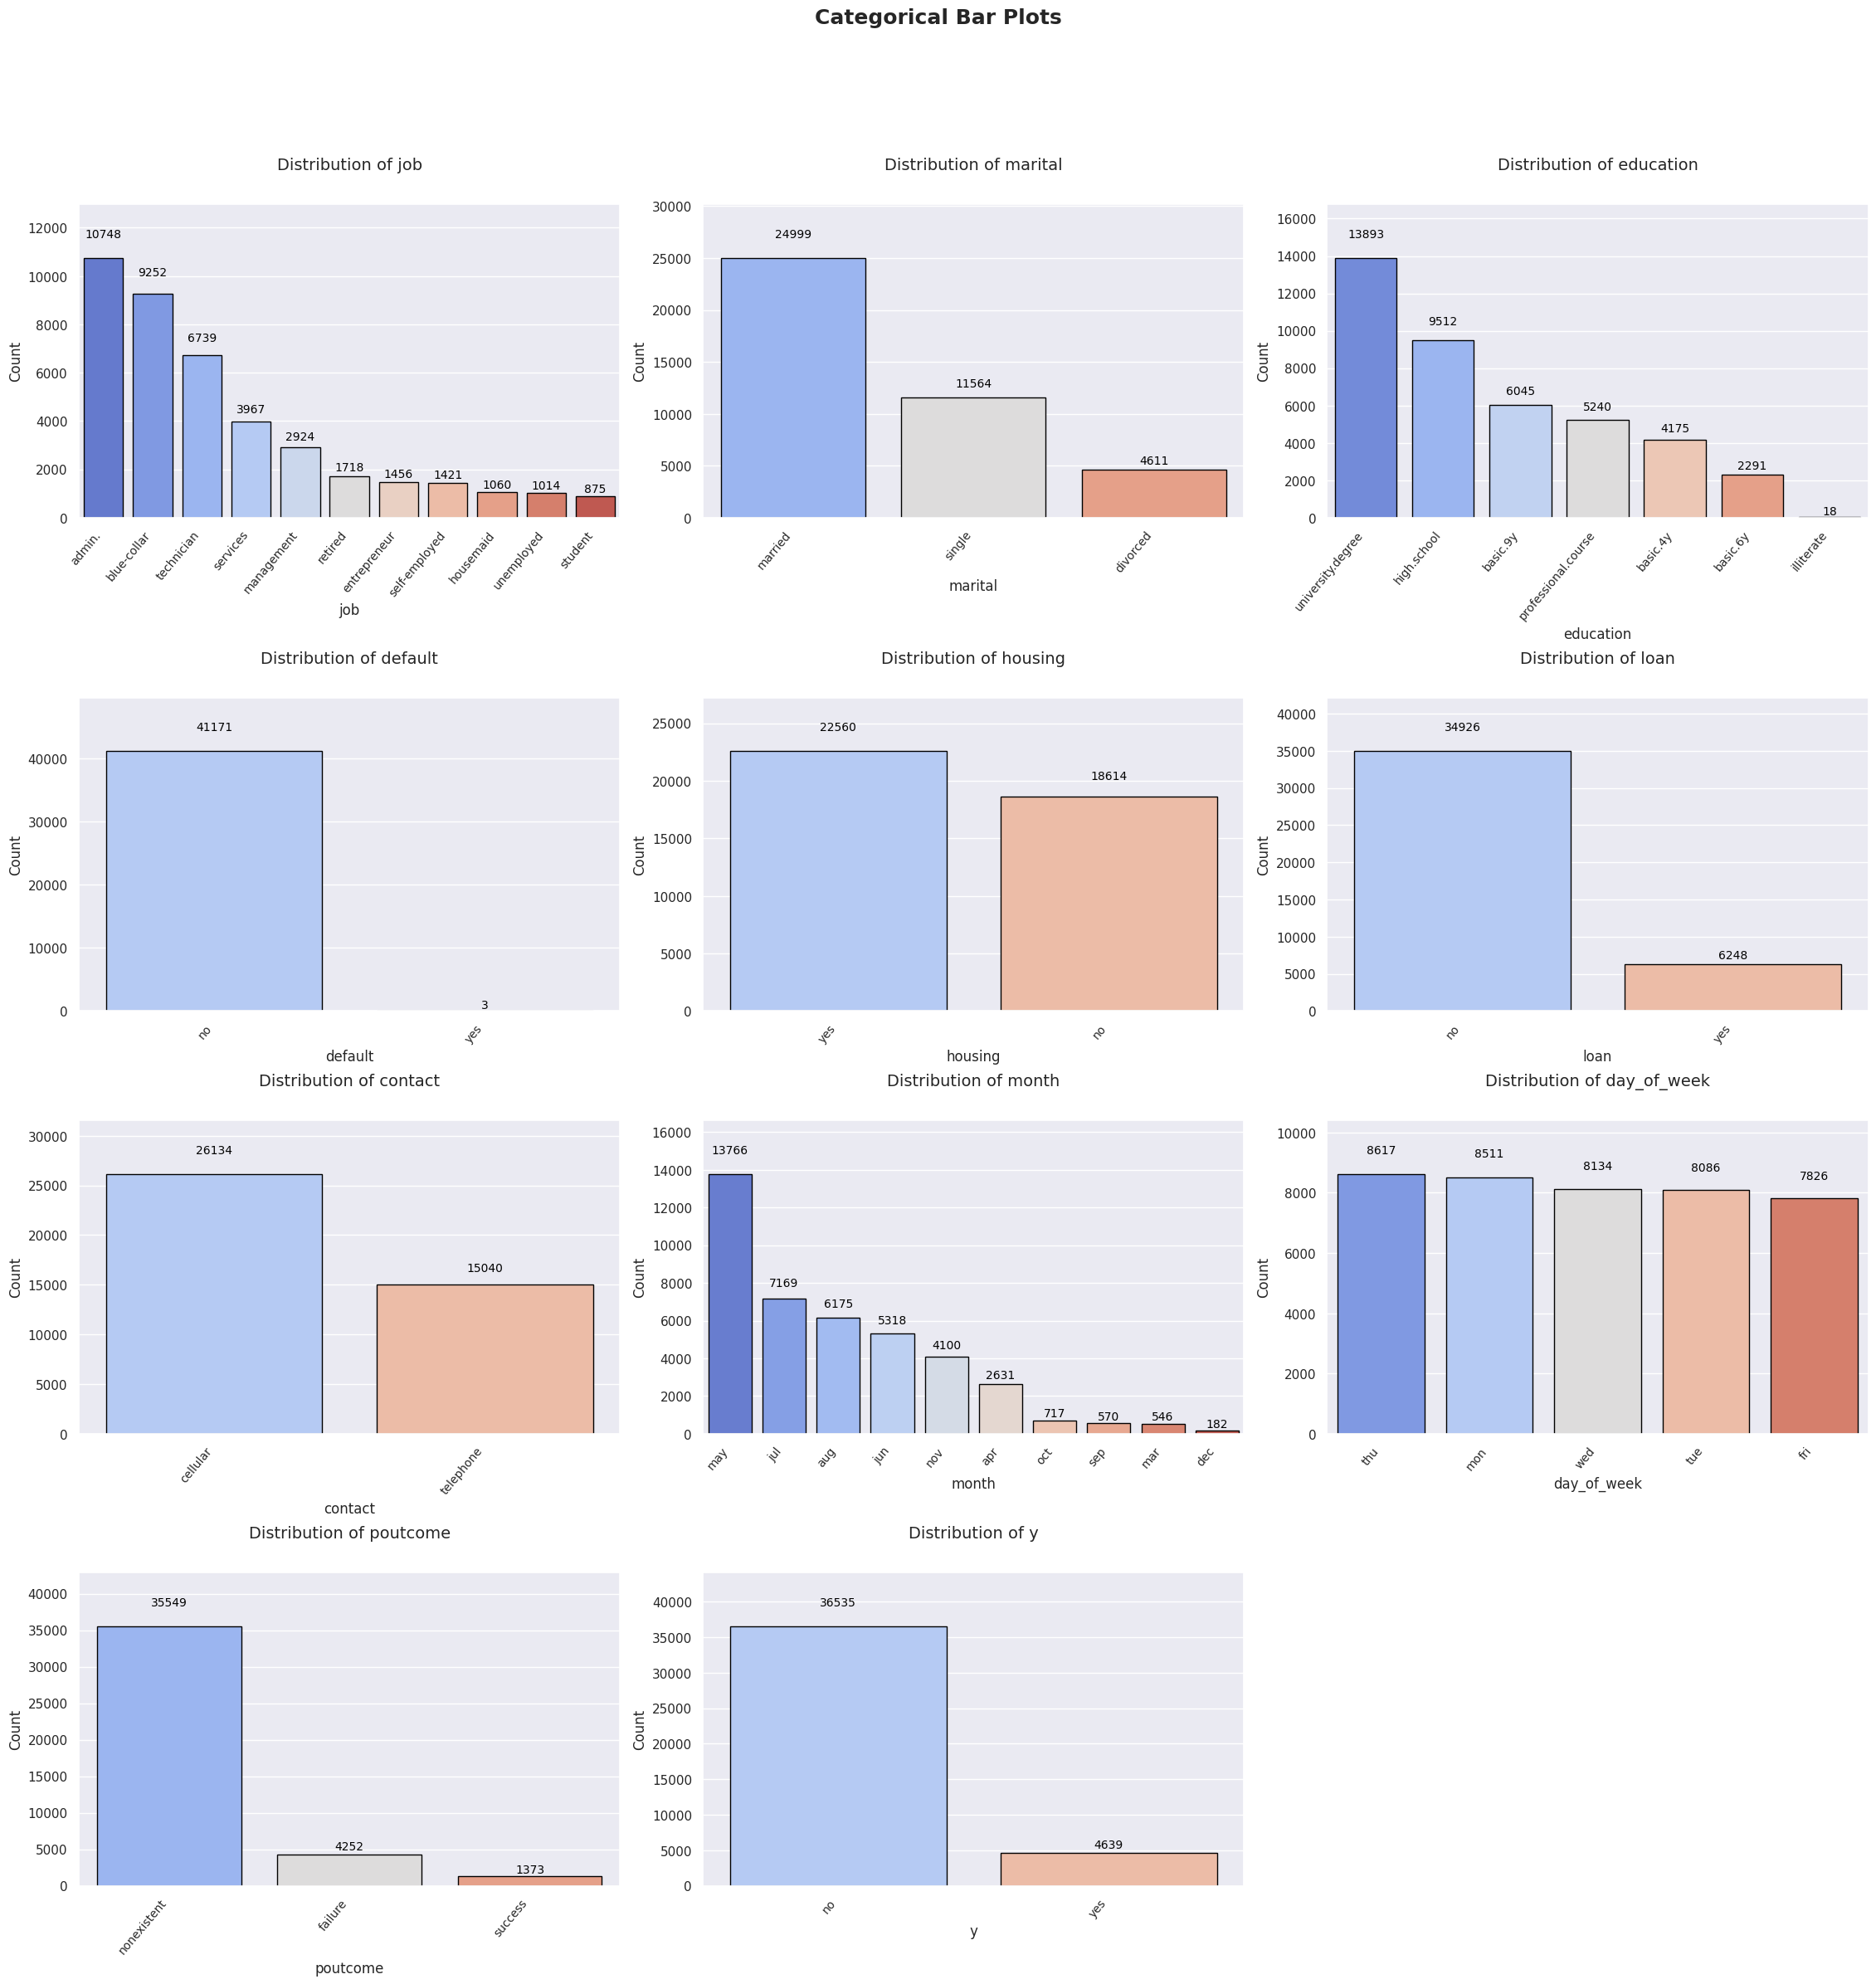

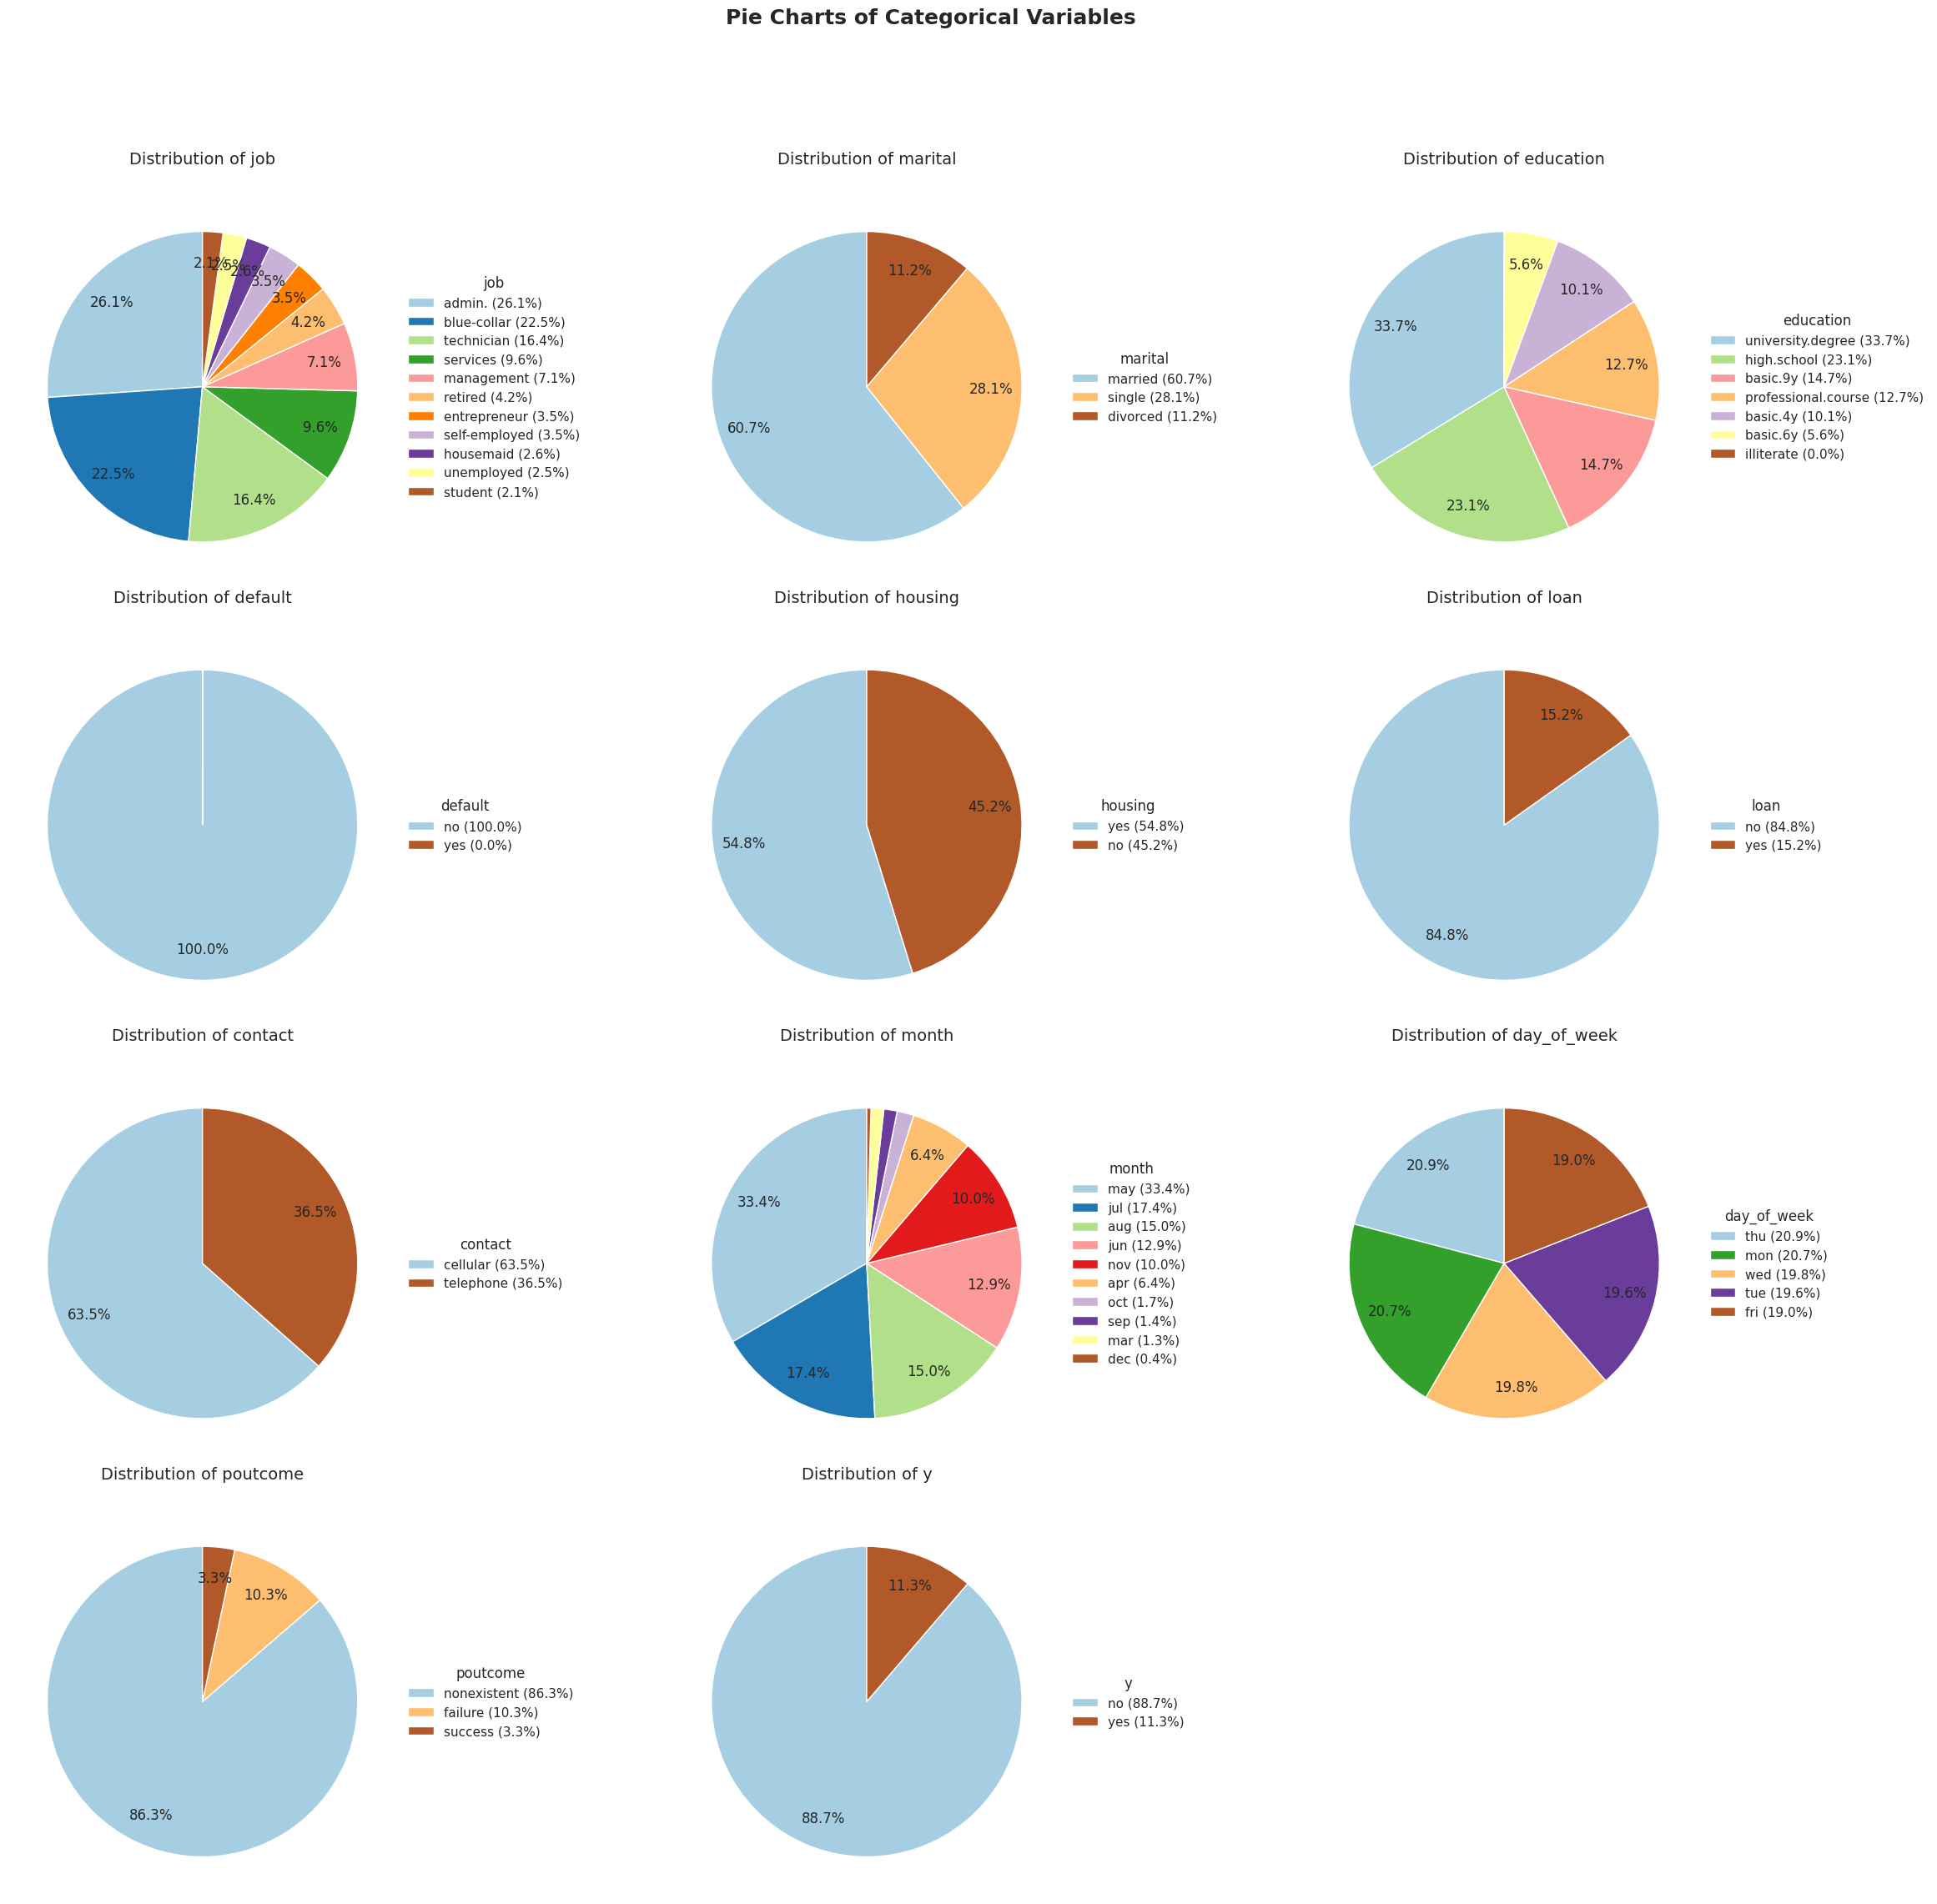

In [ ]:
cat_bar_batches(data, batch_num=1)
cat_pie_chart_batches(data, batch_num=1)

 Bivariate & Multivariate Analysis

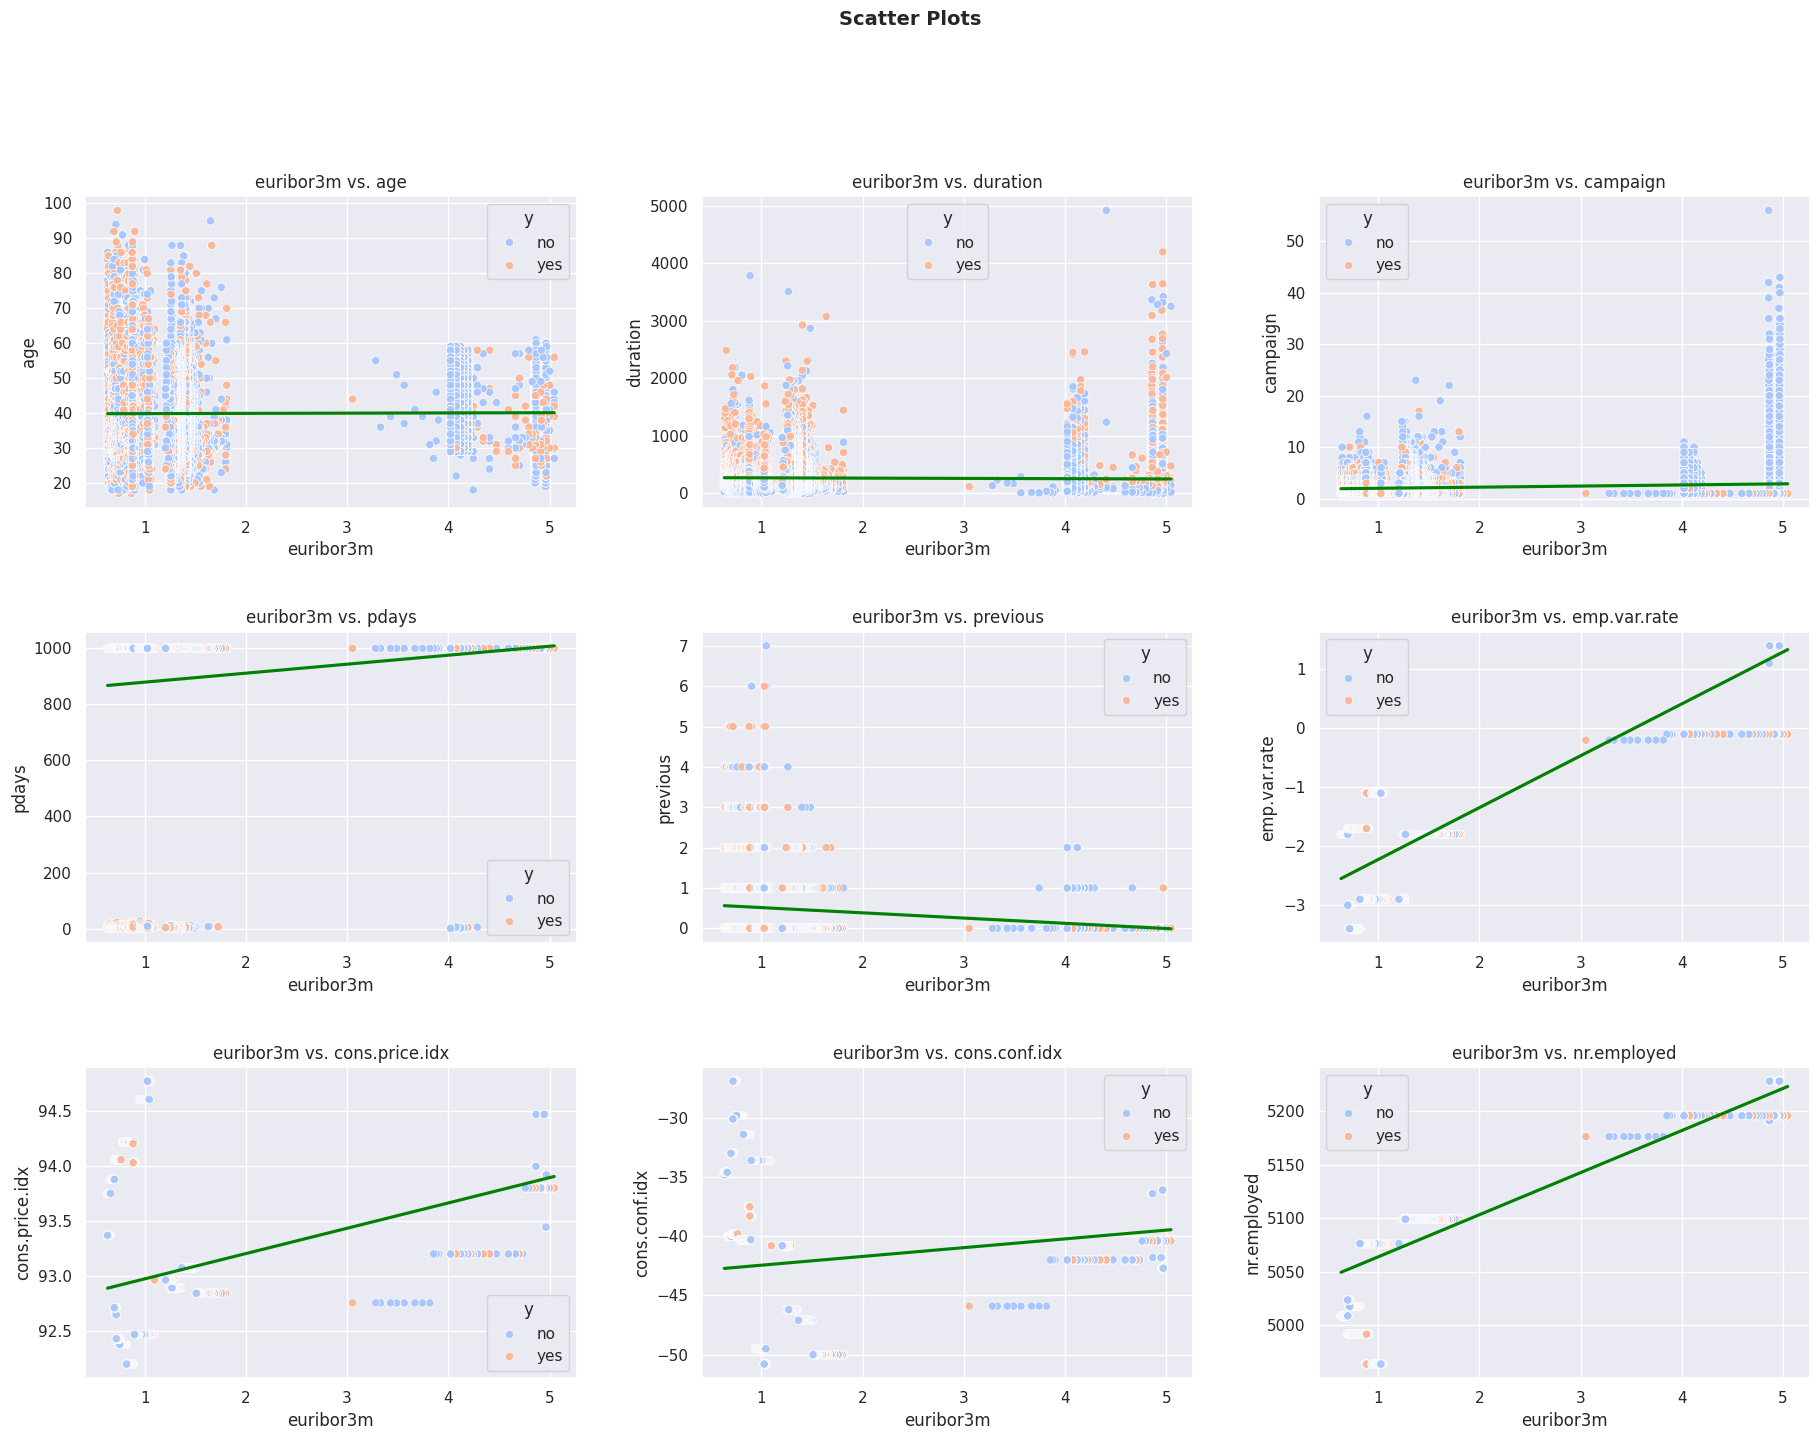

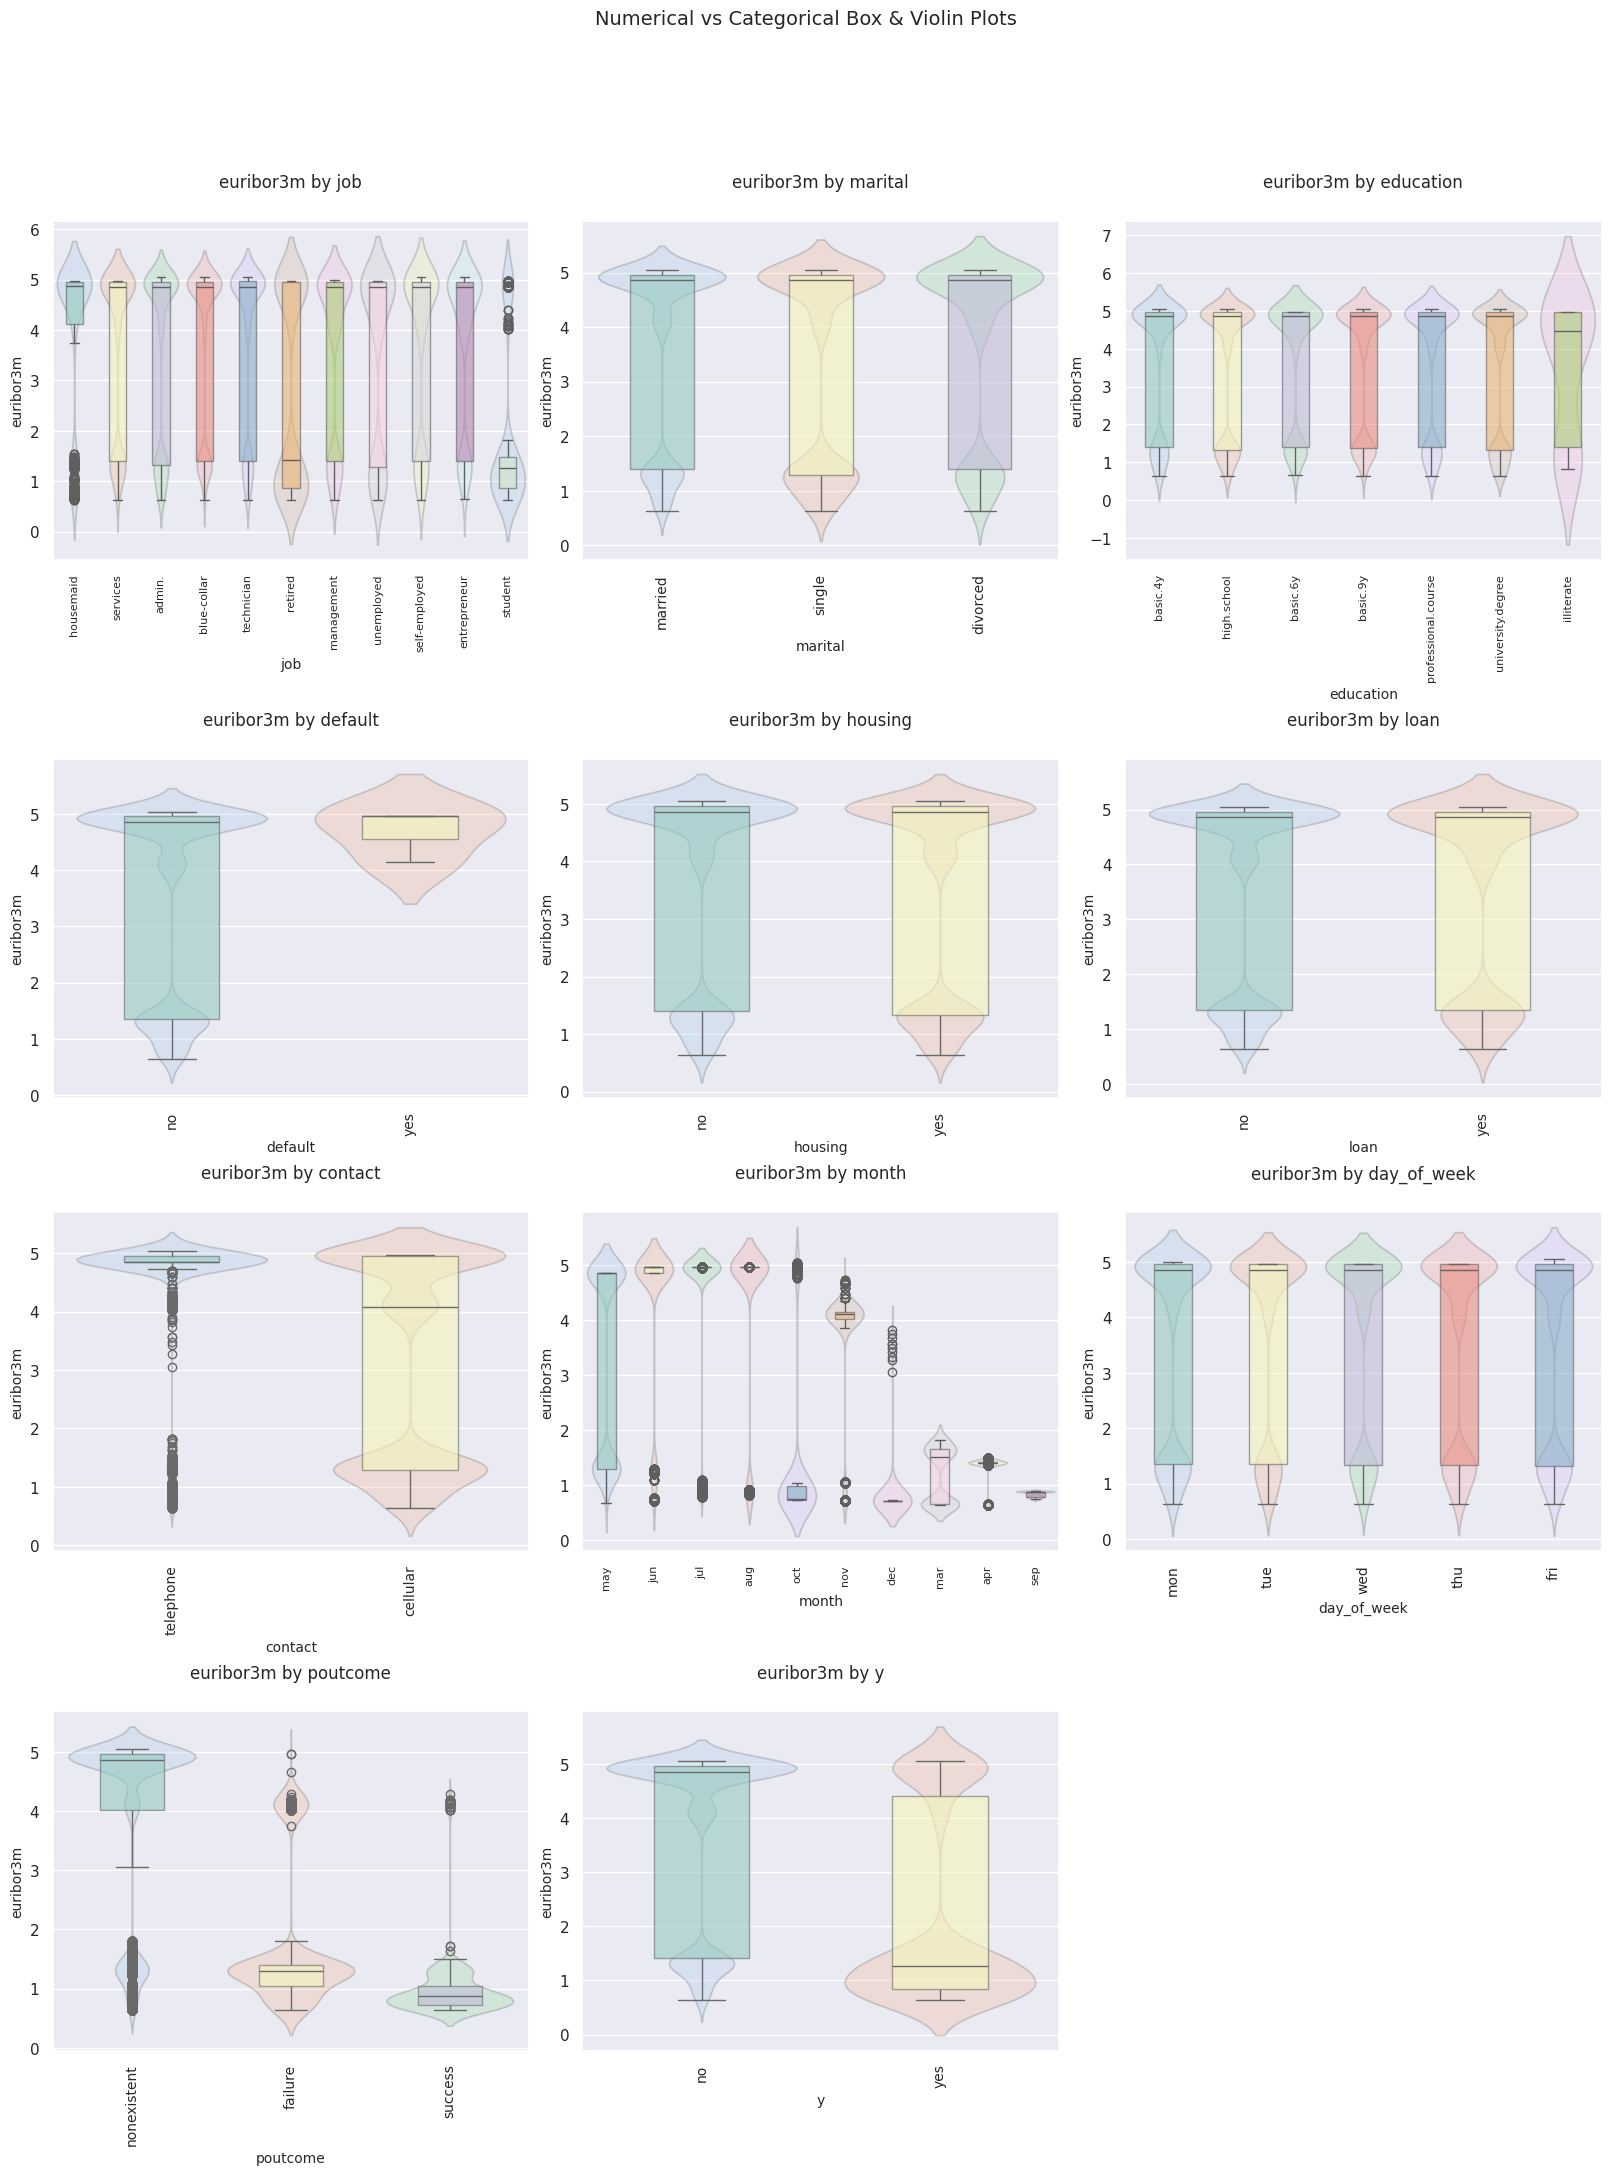

In [ ]:
num_vs_num_scatterplot_pair_batch(data, pair_num=8, batch_num=1, hue_column="y")
num_vs_cat_box_violin_pair_batch(data, pair_num=8, batch_num=1, high_cardinality_limit=22)

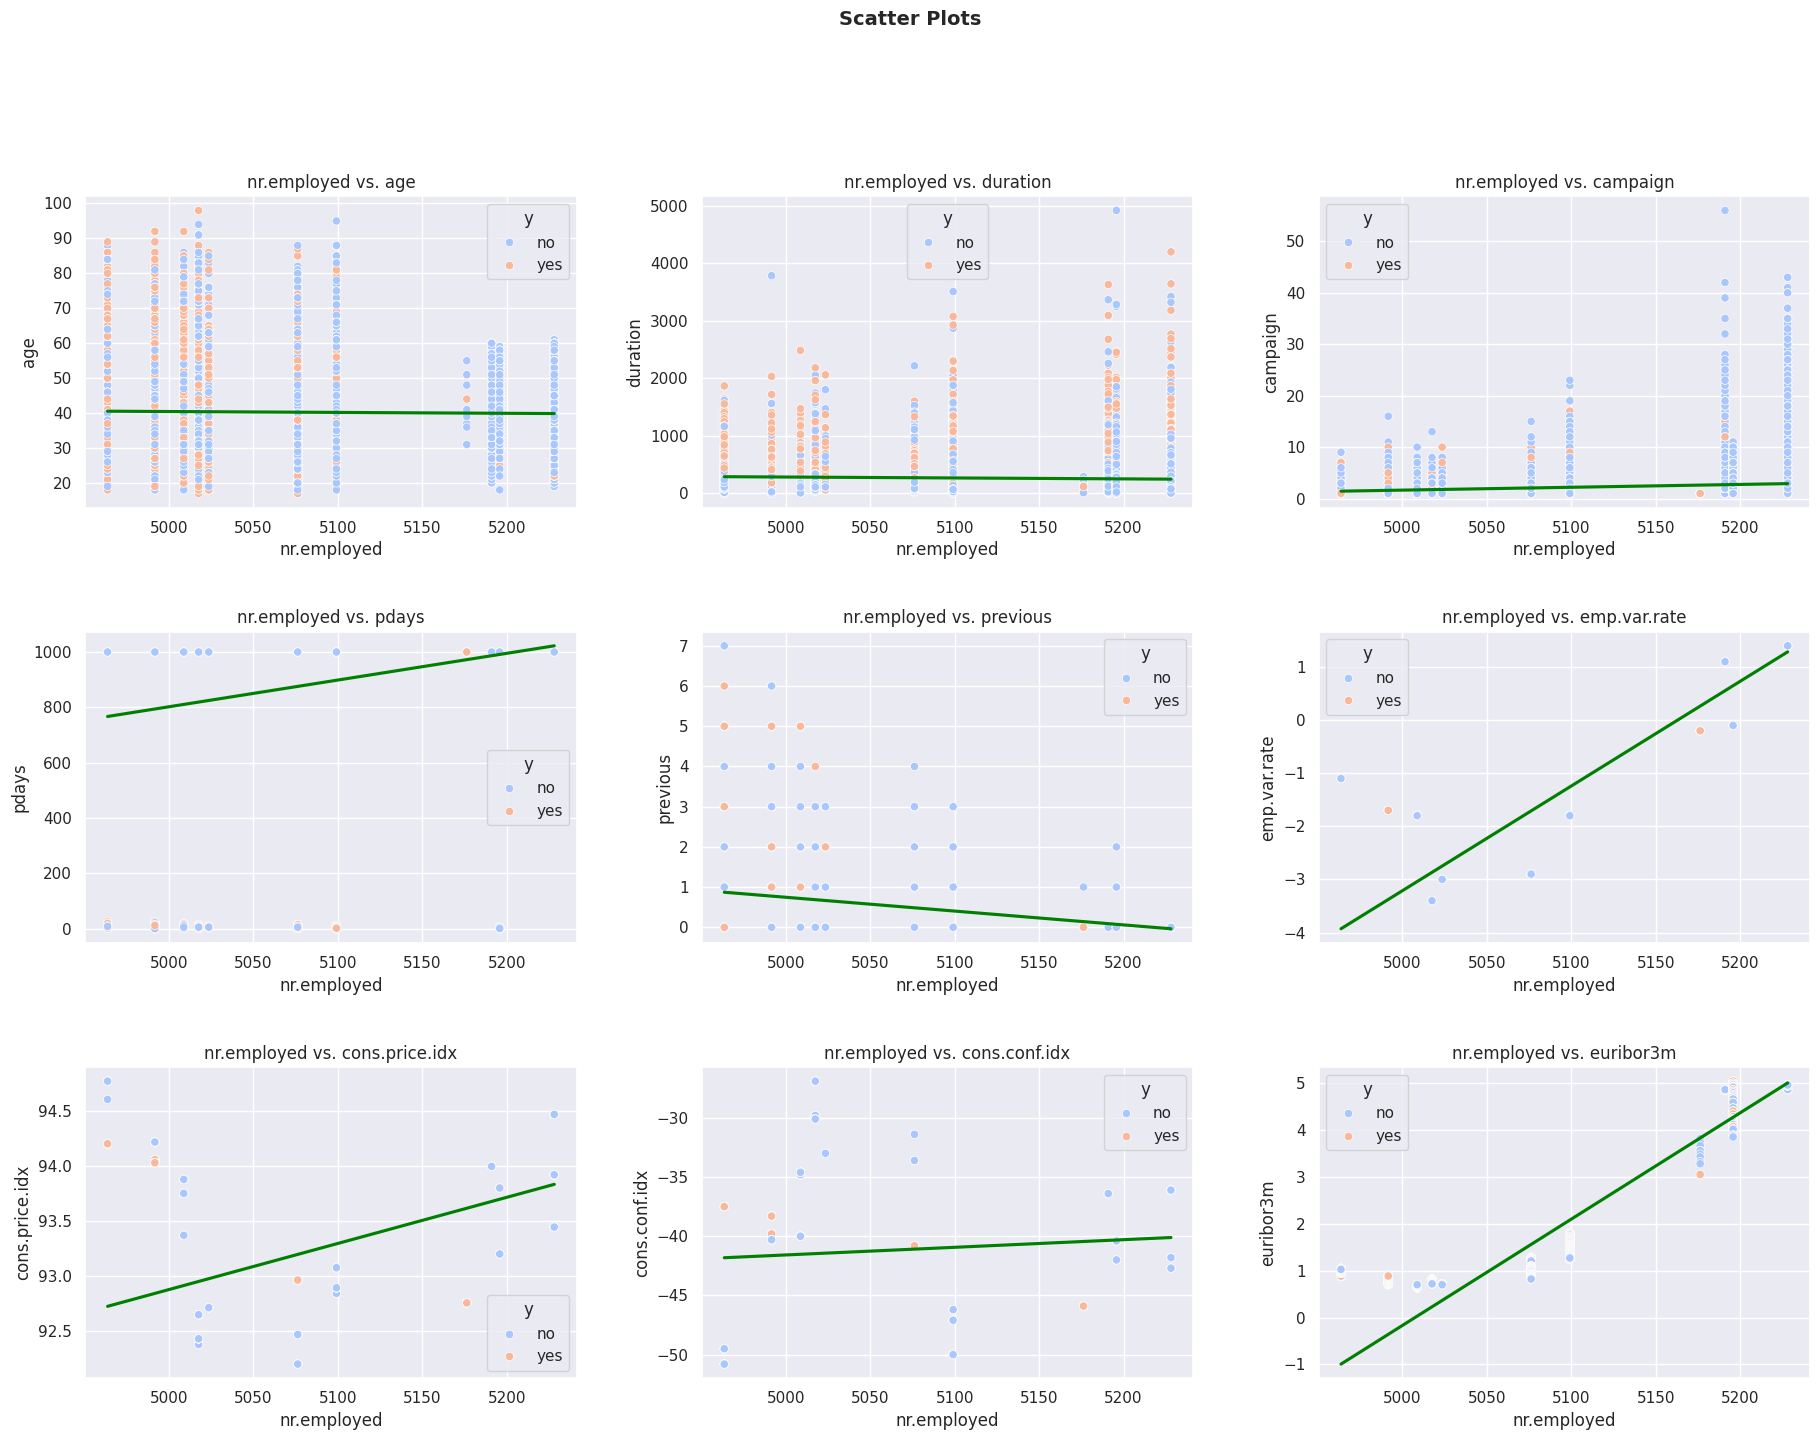

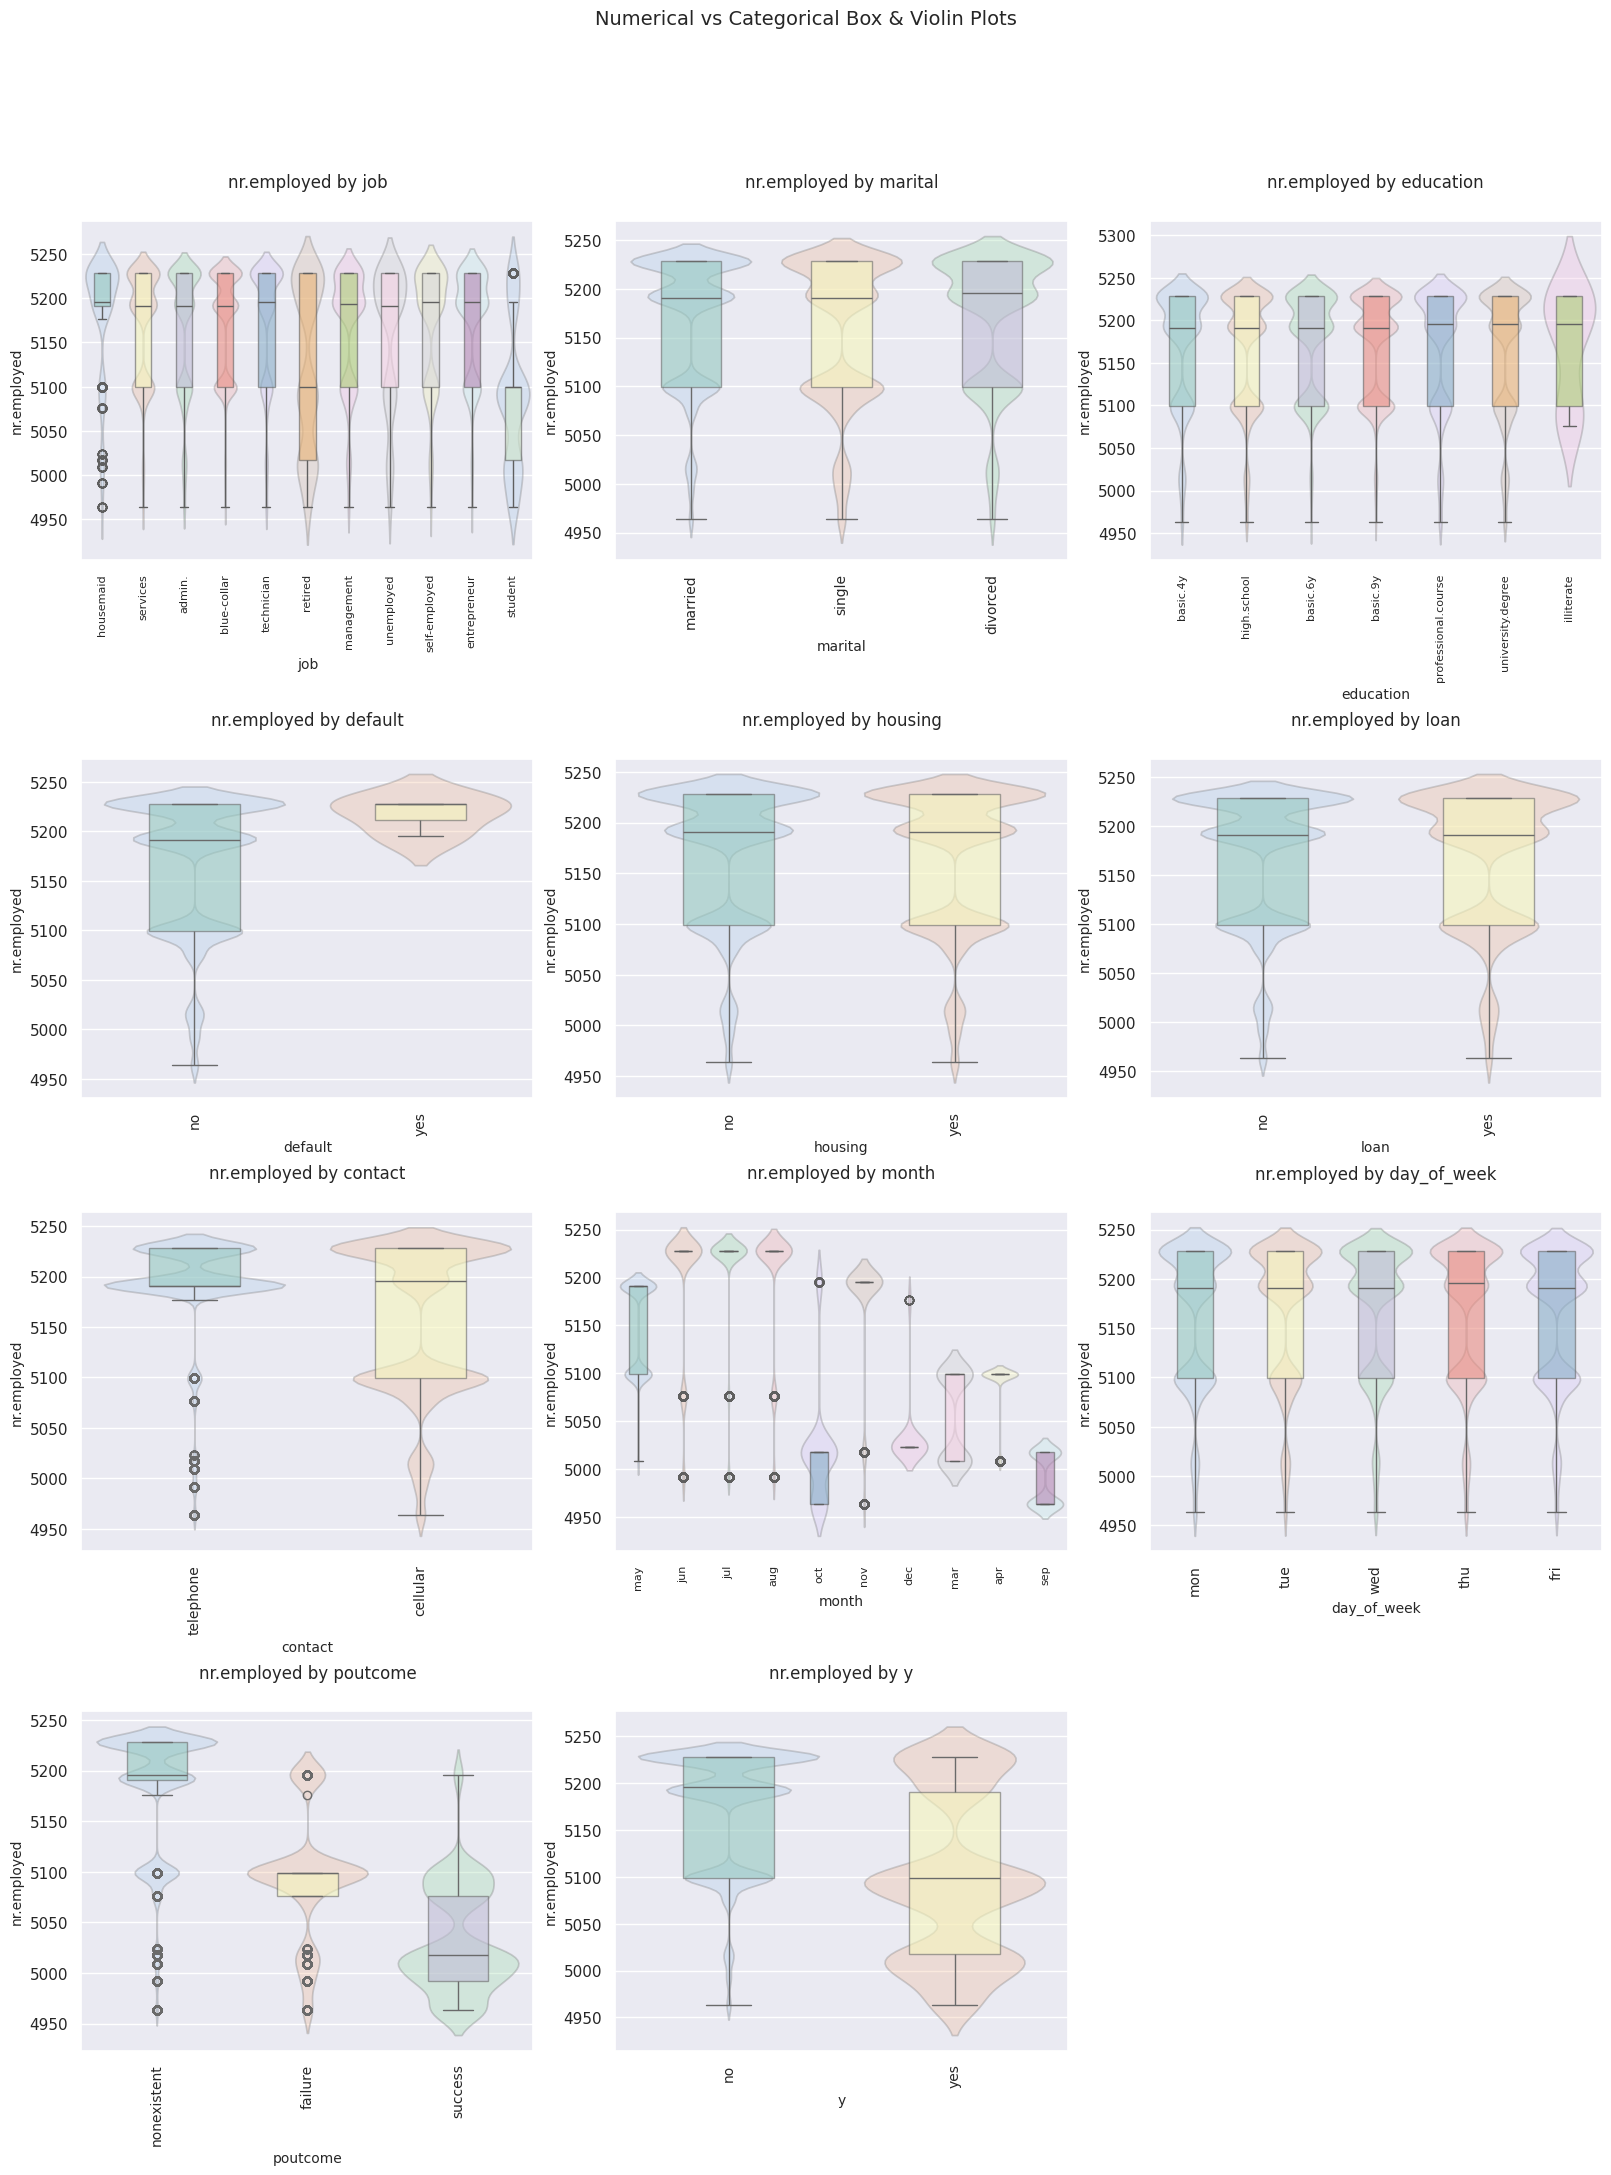

In [ ]:
num_vs_num_scatterplot_pair_batch(data, pair_num=9, batch_num=1, hue_column="y")
num_vs_cat_box_violin_pair_batch(data, pair_num=9, batch_num=1, high_cardinality_limit=22)

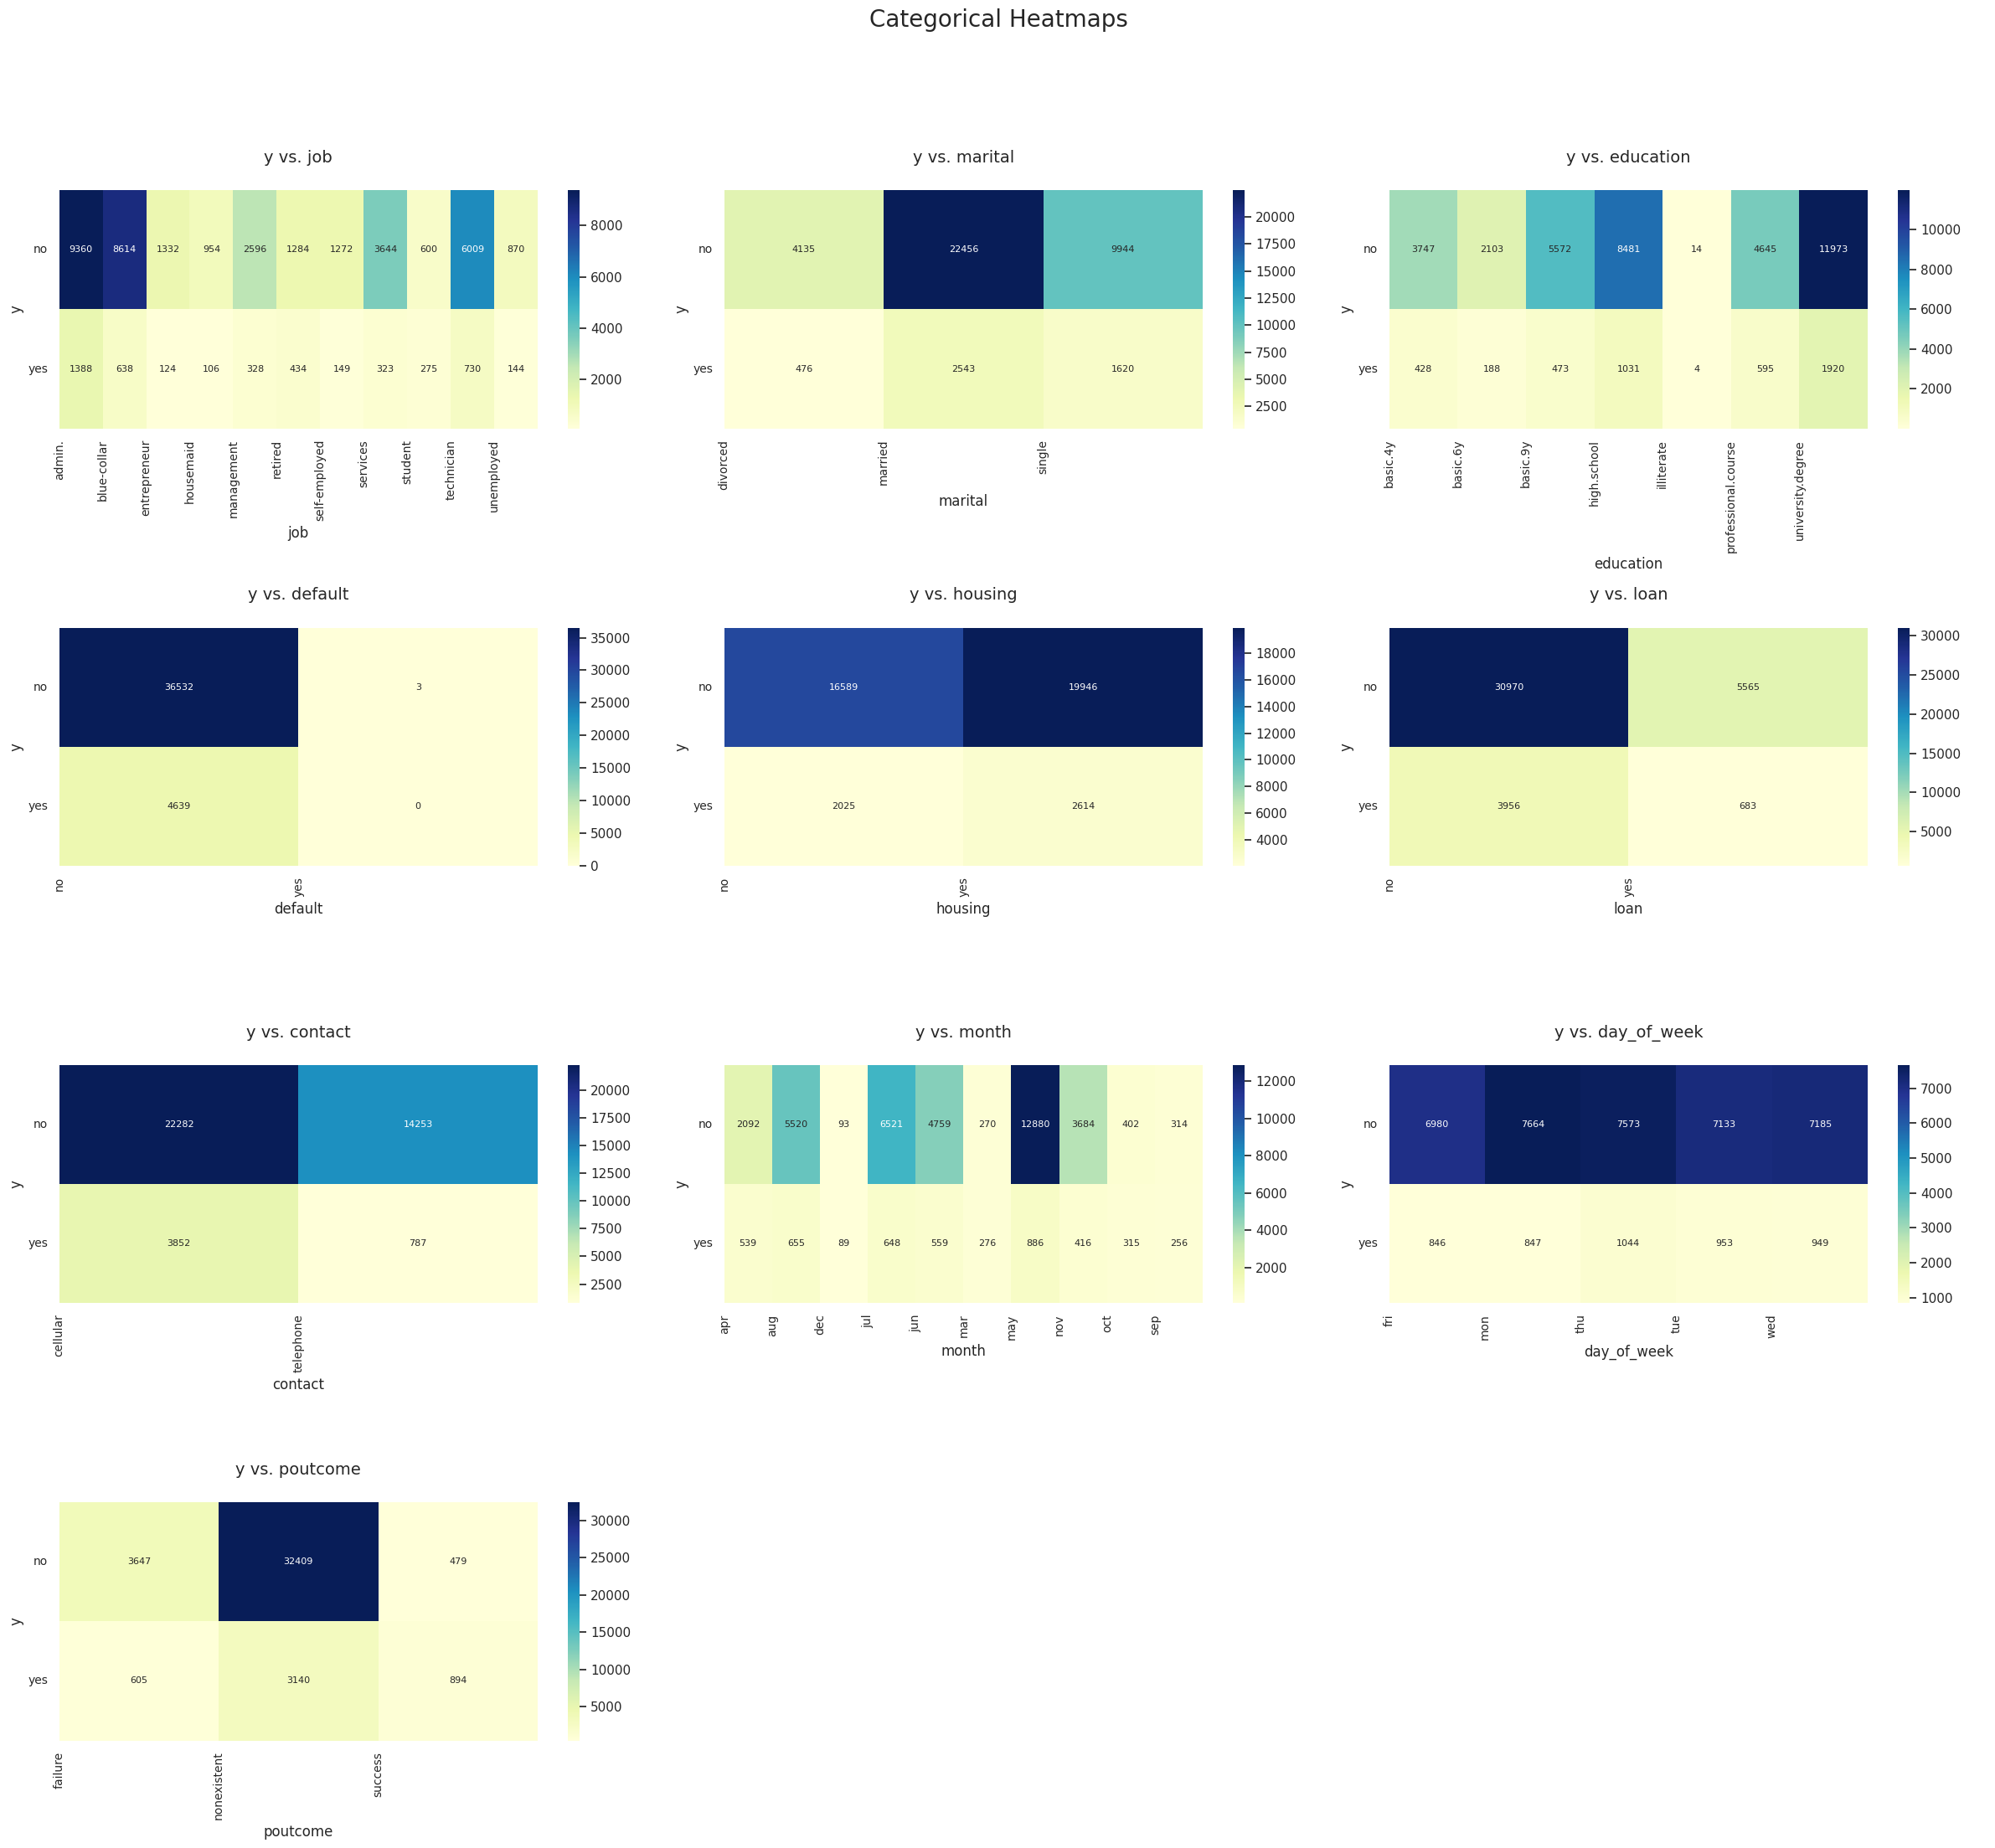

In [ ]:
cat_vs_cat_pair_batch(data, pair_num=10, batch_num=1)

Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [ ]:
scoring = 'accuracy'
data['y'].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

In [ ]:
poutcomes = data[data.poutcome != 'nonexistent'].poutcome.apply(lambda x: 1 if x == 'success' else 0)
coutcomes = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

print('Number of records:', len(data))
print('Success Rate (Current Campaign):', coutcomes.sum() / len(data))
print('Success Rate (Previous Campaign):', poutcomes.sum() / len(poutcomes))

Number of records: 41188
Success Rate (Current Campaign): 0.11265417111780131
Success Rate (Previous Campaign): 0.24408888888888888


In [ ]:
dtypes = pd.DataFrame(data.dtypes.rename('type')).reset_index().astype('str')

In [ ]:
dtypes = dtypes.query('index != "duration"')
numeric = dtypes[(dtypes.type.isin(['int64', 'float64'])) & (dtypes['index'] != 'duration')]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric)) & (dtypes['index'] != 'y')]['index'].values

print('Numeric:\n', numeric,end='\n\n')
print('Categorical:\n', categorical)

Numeric:
 ['age' 'campaign' 'pdays' 'previous' 'emp.var.rate' 'cons.price.idx'
 'cons.conf.idx' 'euribor3m' 'nr.employed']

Categorical:
 ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


Converting dependent variable categorical to dummy

In [ ]:
y = pd.get_dummies(data['y'], columns = ['y'], prefix = ['y'], drop_first = True)
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

 Bank client data Analysis and Categorical Treatment

In [ ]:
data_client = data.iloc[: , 0:7]
data_client.head()

age        job  marital    education  default housing loan
0   56  housemaid  married     basic.4y       no      no   no
1   57   services  married  high.school  unknown      no   no
2   37   services  married  high.school       no     yes   no
3   40     admin.  married     basic.6y       no      no   no
4   56   services  married  high.school       no      no  yes

 Knowing the categorical variables

In [ ]:
print('Jobs:\n', data_client['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [ ]:
print('Marital:\n', data_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [ ]:
print('Education:\n', data_client['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [ ]:
print('Default:\n', data_client['default'].unique())
print('Housing:\n', data_client['housing'].unique())
print('Loan:\n', data_client['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


 Age

In [ ]:
#Trying to find some strange values or null values
print('Min age: ', data_client['age'].max())
print('Max age: ', data_client['age'].min())
print('Null Values: ', data_client['age'].isnull().any())

Min age:  98
Max age:  17
Null Values:  False


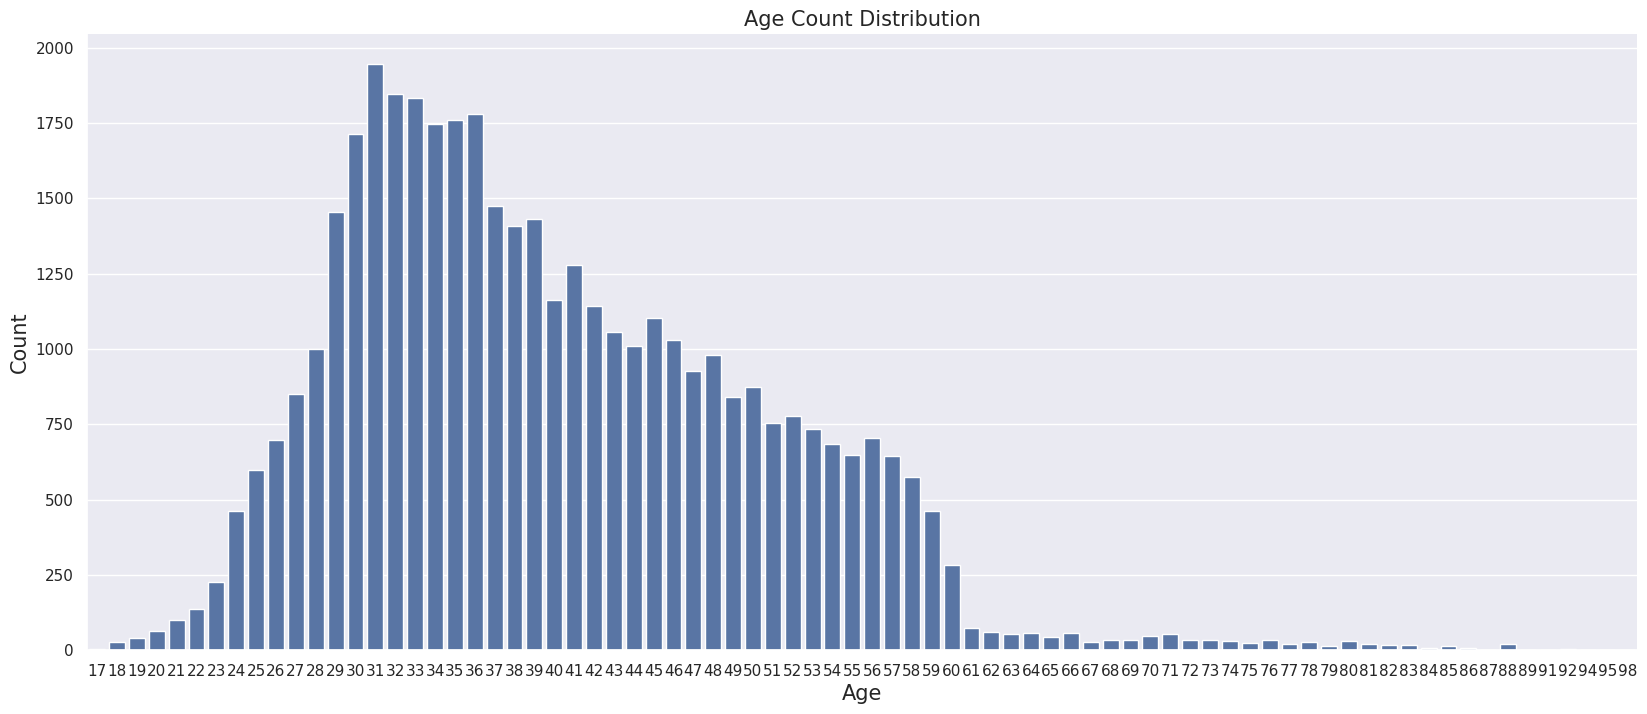

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = data_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

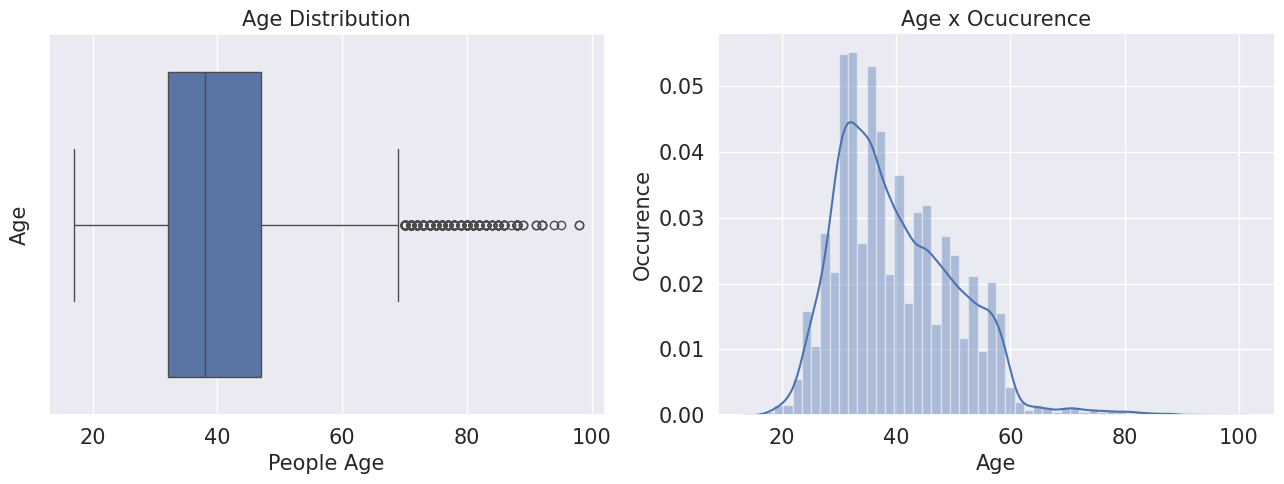

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = data_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(data_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

Calculate the outliers using IQR Method:

In [ ]:
print('Ages above: ', data_client['age'].quantile(q = 0.75) +
                      1.5*(data_client['age'].quantile(q = 0.75) - data_client['age'].quantile(q = 0.25)), 'are outliers')

Ages above:  69.5 are outliers


In [ ]:
print('Number of outliers: ', data_client[data_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(data_client))
print('Outliers are:', round(data_client[data_client['age'] > 69.6]['age'].count()*100/len(data_client),2), '%')

Number of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


In [ ]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(data_client['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(data_client['age'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(data_client['age'].std()*100/data_client['age'].mean(), 1), ', High middle dispersion')

MEAN: 40.0
STD : 10.4
CV  : 26.0 , High middle dispersion


Conclusion about AGE, due to almost high dispersion and just looking at this this graph we cannot conclude if age have a high effect to our variable y, need to keep searching for some pattern. high middle dispersion means we have people with all ages and maybe all of them can subscript a term deposit, or not. The outliers was calculated, so we go with fitting the model with and without them

 JOBS

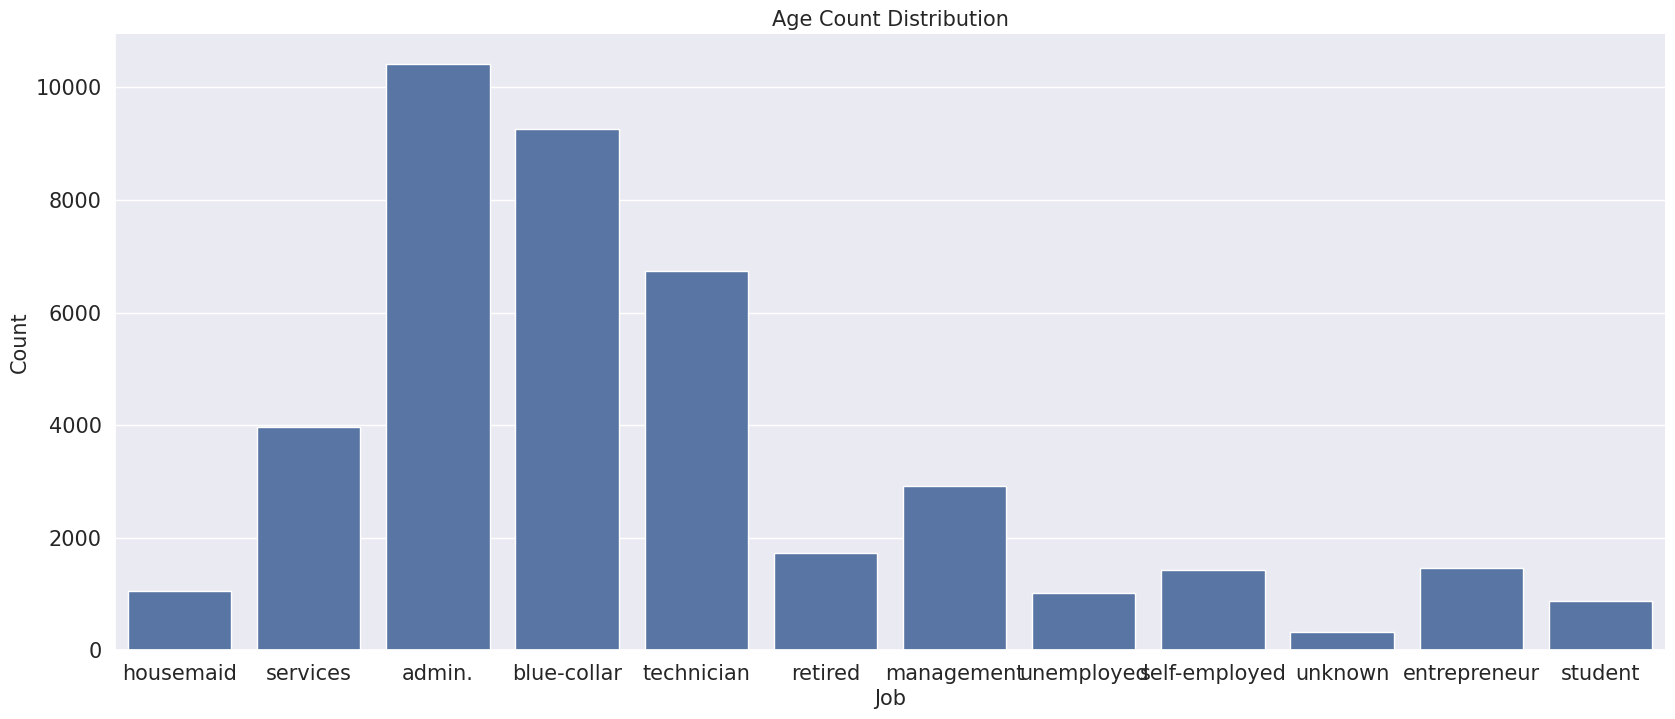

In [ ]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = data_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

 MARITAL

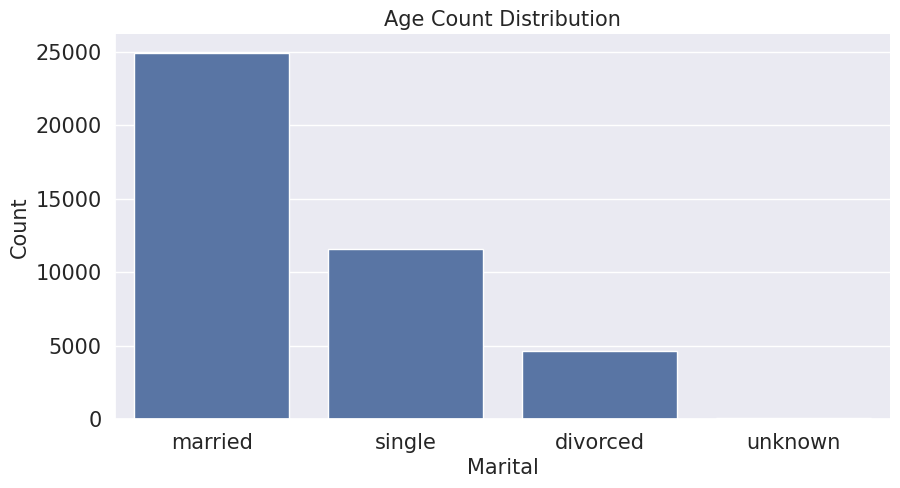

In [ ]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = data_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

 EDUCATION

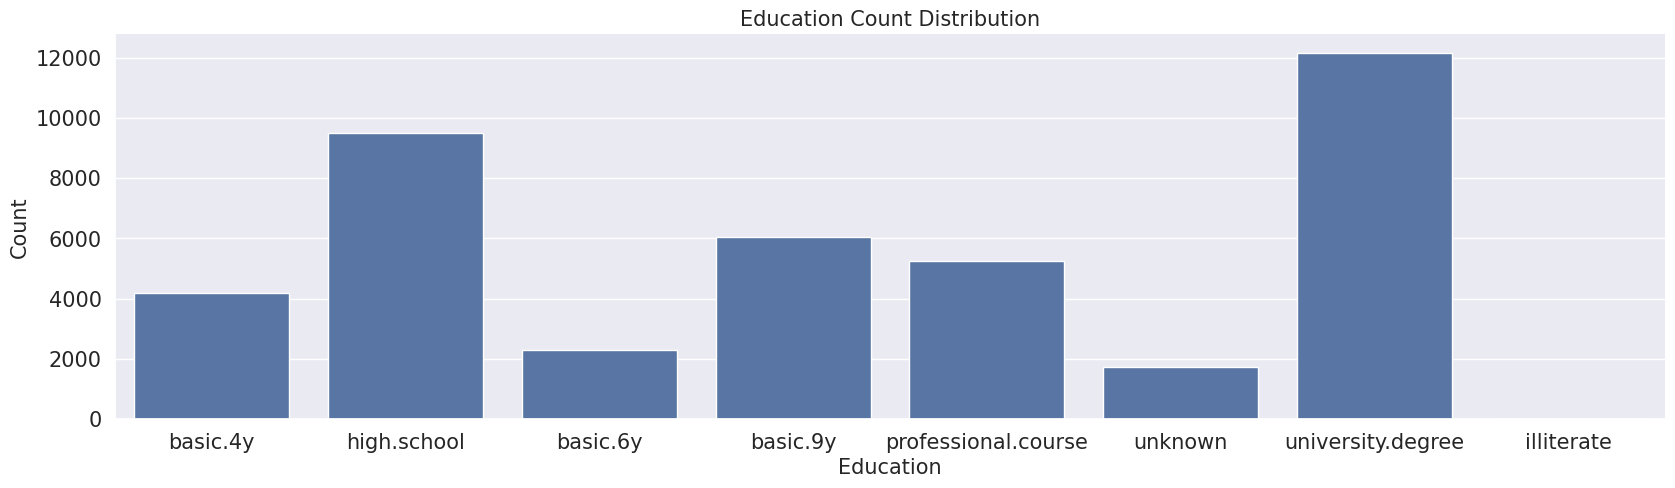

In [ ]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = data_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

 DEFAULT, HOUSING, LOAN

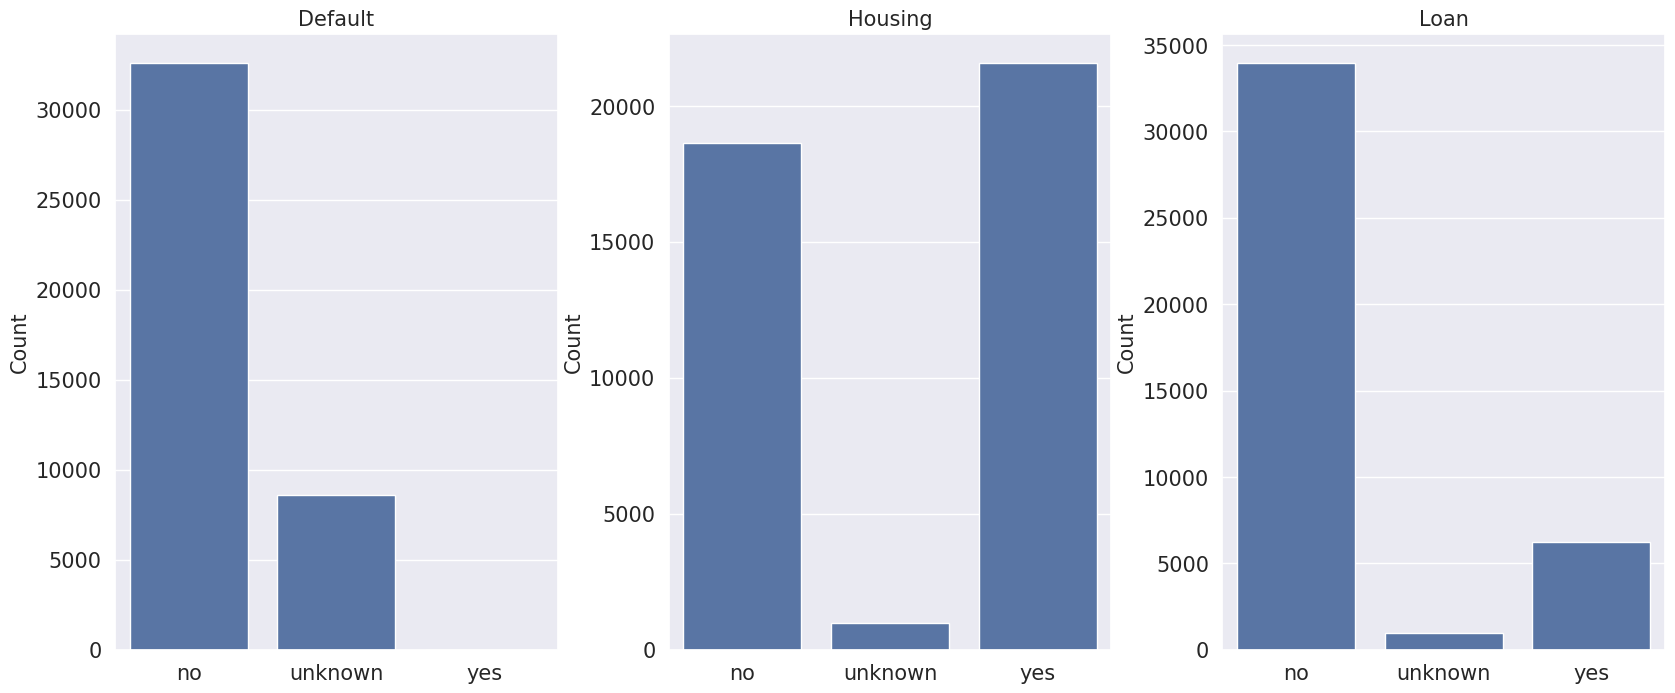

In [ ]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = data_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = data_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = data_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [ ]:
print('Default:\n No credit in default:'     , data_client[data_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', data_client[data_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , data_client[data_client['default'] == 'yes']    ['age'].count())

Default:
 No credit in default: 32588 
 Unknown credit in default: 8597 
 Yes to credit in default: 3


In [ ]:
print('Housing:\n No housing in loan:'     , data_client[data_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', data_client[data_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , data_client[data_client['housing'] == 'yes']    ['age'].count())

Housing:
 No housing in loan: 18622 
 Unknown housing in loan: 990 
 Yes to housing in loan: 21576


In [ ]:
print('Housing:\n No to personal loan:'     , data_client[data_client['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', data_client[data_client['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , data_client[data_client['loan'] == 'yes']    ['age'].count())

Housing:
 No to personal loan: 33950 
 Unknown to personal loan: 990 
 Yes to personal loan: 6248


BANK CLIENTS CONCLUSION
Jobs, Marital and Education i think the best analysis is just the count of each variable, if we relate with the other ones its is not conclusive, all this kind of variables has yes, unknown and no for loan, default and housing.

Default, loan and housing, its just to see the distribution of people.

 Bank Client Categorical Treatment


Jobs, Marital, Education, Default, Housing, Loan. Converting to continuous due the feature scaling will be apllyed later

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
data_client['job']      = labelencoder_X.fit_transform(data_client['job'])
data_client['marital']  = labelencoder_X.fit_transform(data_client['marital'])
data_client['education']= labelencoder_X.fit_transform(data_client['education'])
data_client['default']  = labelencoder_X.fit_transform(data_client['default'])
data_client['housing']  = labelencoder_X.fit_transform(data_client['housing'])
data_client['loan']     = labelencoder_X.fit_transform(data_client['loan'])

In [ ]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4

    return dataframe

age(data_client);

In [ ]:
data_client.head()

age  job  marital  education  default  housing  loan
0    3    3        1          0        0        0     0
1    3    7        1          3        1        0     0
2    2    7        1          3        0        2     0
3    2    0        1          1        0        0     0
4    3    7        1          3        0        0     2

In [ ]:
print(data_client.shape)
data_client.head()

(41188, 7)


age  job  marital  education  default  housing  loan
0    3    3        1          0        0        0     0
1    3    7        1          3        1        0     0
2    2    7        1          3        0        2     0
3    2    0        1          1        0        0     0
4    3    7        1          3        0        0     2

Related with the last contact of the current campaign

In [ ]:
data_related = data.iloc[: , 7:11]
data_related.head()

contact month day_of_week  duration
0  telephone   may         mon       261
1  telephone   may         mon       149
2  telephone   may         mon       226
3  telephone   may         mon       151
4  telephone   may         mon       307

In [ ]:
data_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [ ]:
print("Kind of Contact: \n", data_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", data_related['month'].unique())
print("\nWhich days of week this campaing work: \n", data_related['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


 Duration

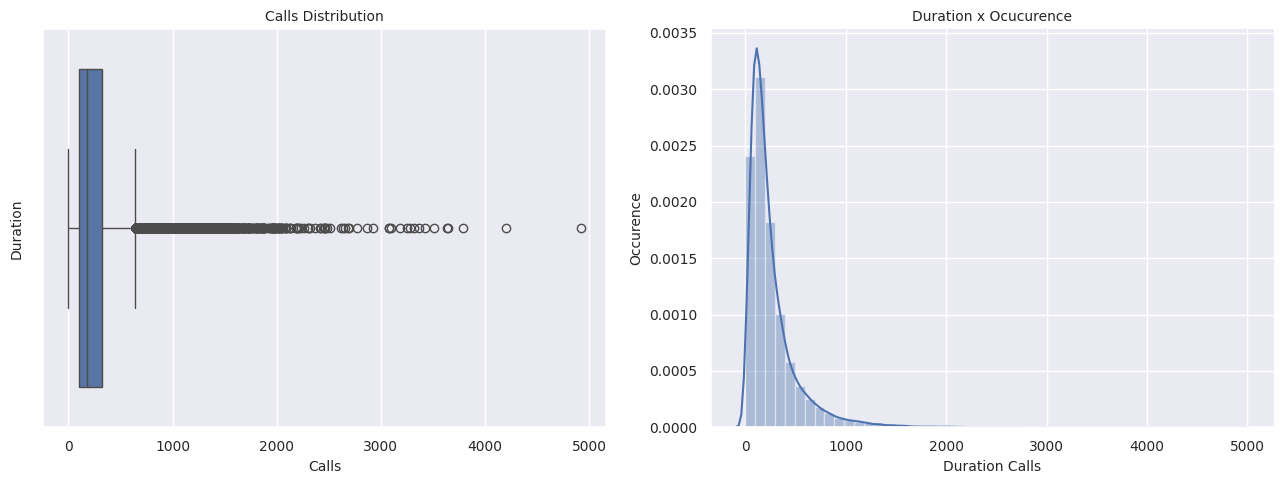

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = data_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(data_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

PLease note: duration is different from age, Age has 78 values and Duration has 1544 different values

In [ ]:
print("Max duration  call in minutes:  ", round((data_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((data_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((data_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((data_related['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


Calculation of outlier for duration

In [ ]:
print('Duration calls above: ', data_related['duration'].quantile(q = 0.75) +
                      1.5*(data_related['duration'].quantile(q = 0.75) - data_related['duration'].quantile(q = 0.25)), 'are outliers')

Duration calls above:  644.5 are outliers


In [ ]:
print('Number of outliers: ', data_related[data_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(data_related))
#Outliers in %
print('Outliers are:', round(data_related[data_related['duration'] > 644.5]['duration'].count()*100/len(data_related),2), '%')

Number of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


if the call duration is iqual to 0, then is obviously that this person didn't subscribed.

In [ ]:
data[(data['duration'] == 0)]

age          job   marital          education default housing loan  \
6251    39       admin.   married        high.school      no     yes   no   
23031   59   management   married  university.degree      no     yes   no   
28063   53  blue-collar  divorced        high.school      no     yes   no   
33015   31  blue-collar   married           basic.9y      no      no   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
6251   telephone   may         tue         0         4    999         0   
23031   cellular   aug         tue         0        10    999         0   
28063   cellular   apr         fri         0         3    999         0   
33015   cellular   may         mon         0         2    999         0   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
6251   nonexistent           1.1          93.994          -36.4      4.857   
23031  nonexistent           1.4          93.444          -36.1      4.965   
28063  nonexistent          -1.8          93.075          -47.1      1.479   
33015  nonexistent          -1.8          92.893          -46.2      1.299   

       nr.employed   y  
6251        5191.0  no  
23031       5228.1  no  
28063       5099.1  no  
33015       5099.1  no

 Contact, Month, Day of Week

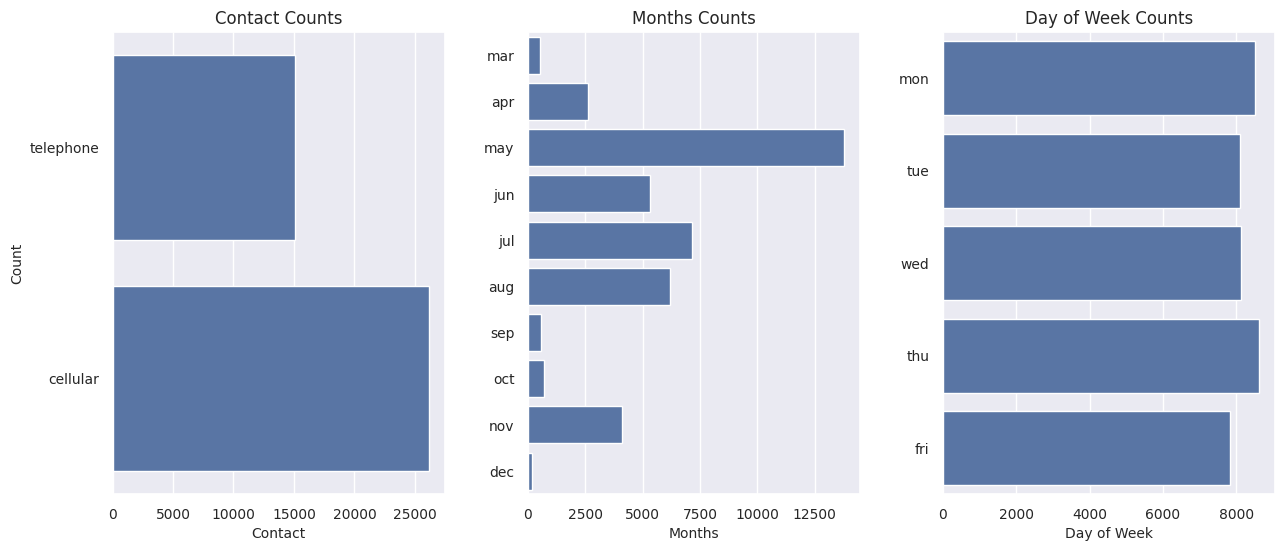

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(data_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(data_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(data_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [ ]:
print('Ages above: ', data_related['duration'].quantile(q = 0.75) +
                      1.5*(data_related['duration'].quantile(q = 0.75) - data_related['duration'].quantile(q = 0.25)), 'are outliers')

Ages above:  644.5 are outliers


In [ ]:
data_related[data_related['duration'] > 640].count()

contact        3008
month          3008
day_of_week    3008
duration       3008
dtype: int64

 Contact, Month, Day of Week treatment

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
data_related['contact']     = labelencoder_X.fit_transform(data_related['contact'])
data_related['month']       = labelencoder_X.fit_transform(data_related['month'])
data_related['day_of_week'] = labelencoder_X.fit_transform(data_related['day_of_week'])

In [ ]:
data_related.head()

contact  month  day_of_week  duration
0        1      6            1       261
1        1      6            1       149
2        1      6            1       226
3        1      6            1       151
4        1      6            1       307

Converting the Duration into minutes

In [ ]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']   = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration']   = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(data_related);

In [ ]:
data_related.head()

contact  month  day_of_week  duration
0        1      6            1         3
1        1      6            1         2
2        1      6            1         3
3        1      6            1         2
4        1      6            1         3

Social and economic context attributes

In [ ]:
data_se = data.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
data_se.head()

emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0           1.1          93.994          -36.4      4.857       5191.0
1           1.1          93.994          -36.4      4.857       5191.0
2           1.1          93.994          -36.4      4.857       5191.0
3           1.1          93.994          -36.4      4.857       5191.0
4           1.1          93.994          -36.4      4.857       5191.0

Other attributes

In [ ]:
data_o = data.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
data_o.head()

campaign  pdays  previous     poutcome
0         1    999         0  nonexistent
1         1    999         0  nonexistent
2         1    999         0  nonexistent
3         1    999         0  nonexistent
4         1    999         0  nonexistent

In [ ]:
data_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [ ]:
data_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

Model

In [ ]:
bank_final= pd.concat([data_client, data_related, data_se, data_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx',
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 20)

Feature Importance using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

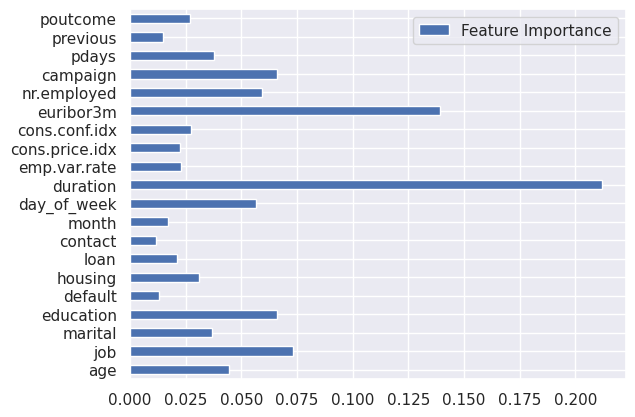

In [ ]:
pd.DataFrame(data = RandomForestClassifier().fit(bank_final,y).feature_importances_,index=bank_final.columns
             ,columns=['Feature Importance']).plot.barh();

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
X_train.head()

age  job  marital  education  default  housing  loan  contact  month  \
39577    4    5        1          2        0        0     0        0      6   
10104    3    9        1          6        0        2     0        1      4   
17235    2    7        1          3        0        0     0        0      3   
20926    1    0        2          6        0        2     0        0      1   
17626    3    2        1          2        0        2     0        0      3   

       day_of_week  duration  emp.var.rate  cons.price.idx  cons.conf.idx  \
39577            3         2          -1.8          93.876          -40.0   
10104            2         4           1.4          94.465          -41.8   
17235            0         4           1.4          93.918          -42.7   
20926            2         4           1.4          93.444          -36.1   
17626            1         2           1.4          93.918          -42.7   

       euribor3m  nr.employed  campaign  pdays  previous  poutcome  
39577      0.668       5008.7         1    999         2         2  
10104      4.958       5228.1         1    999         0         1  
17235      4.962       5228.1         4    999         0         1  
20926      4.964       5228.1         1    999         0         1  
17626      4.962       5228.1         5    999         0         1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)
print('The Confusion Matrix \n',+confusion_matrix(y_test, logpred),end='\n\n')
print('Accuracy : ',+round(accuracy_score(y_test, logpred),2)*100)
print('Cohen kappa : ',+round(cohen_kappa_score(y_test, logpred),2))
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring)).mean()

The Confusion Matrix 
 [[7107  172]
 [ 621  338]]

Accuracy :  90.0
Cohen kappa :  0.41


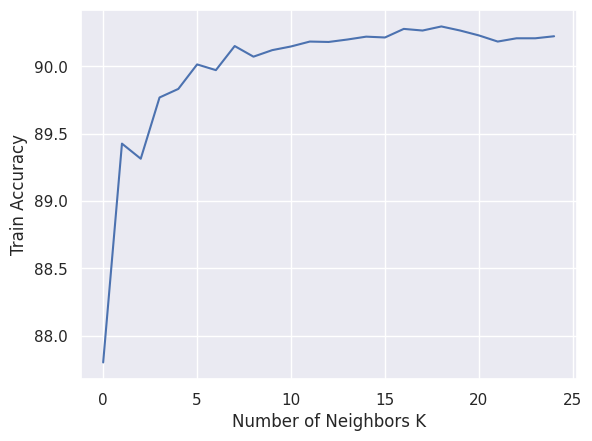

In [ ]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(bank_final, y, test_size = 0.2, random_state = 00)
neighbors = np.arange(0,25)
cv_scores = []
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123, shuffle=True)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring=scoring)
    cv_scores.append(scores.mean()*100)


plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
print('Cohen kappa : ',+round(cohen_kappa_score(y_test, knnpred),2))
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring).mean())

[[7046  233]
 [ 617  342]]
90.0
Cohen kappa :  0.39


In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
print('Cohen kappa : ',+round(cohen_kappa_score(y_test, svcpred),2))
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring).mean())

[[6778  501]
 [ 646  313]]
86.0
Cohen kappa :  0.28


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
print('Cohen kappa : ',+round(cohen_kappa_score(y_test, dtreepred),2))
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring).mean())

[[6809  470]
 [ 495  464]]
88.0
Cohen kappa :  0.42


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
print('Cohen kappa : ',+round(cohen_kappa_score(y_test, rfcpred),2))
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring).mean())

[[6997  282]
 [ 512  447]]
90.0
Cohen kappa :  0.48


In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
print('Cohen kappa : ',+round(cohen_kappa_score(y_test, gaussiannbpred),2))
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring).mean())

[[6451  828]
 [ 433  526]]
85.0
Cohen kappa :  0.37


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
print('Cohen kappa : ',+round(cohen_kappa_score(y_test, xgbprd),2))
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[6990  289]
 [ 472  487]]
91.0
Cohen kappa :  0.51


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
print('Cohen kappa : ',+round(cohen_kappa_score(y_test, gbkpred),2))
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring).mean())

[[7023  256]
 [ 487  472]]
91.0
Cohen kappa :  0.51


In [ ]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

Models     Score
7         Gradient Boosting  0.914203
6                   XGBoost  0.912382
4            Logistic Model  0.910015
0  Random Forest Classifier  0.909772
3          K-Near Neighbors  0.900637
1  Decision Tree Classifier  0.885008
2    Support Vector Machine  0.858786
5                Gausian NB  0.845038

In [ ]:
comparision = {
    'Logistic Accuracy':(cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring)),
    'KNN Accuracy': (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring)),
    'SVC Accuracy':(cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring)),
    'Decision Tree Accuracy':(cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring)),
    'Random Forest Accuracy':(cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring)),
    'Guassian Accuracy':(cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring)),
    'XGBoost Accuracy':(cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10)),
    'Gradient Boosting Accuracy':(cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = scoring))
}

In [ ]:
pd.DataFrame(comparision)

Logistic Accuracy  KNN Accuracy  SVC Accuracy  Decision Tree Accuracy  \
0           0.909863      0.905615      0.850683                0.884674   
1           0.904097      0.897724      0.866464                0.882246   
2           0.910167      0.898331      0.849469                0.876480   
3           0.912898      0.905615      0.866768                0.888316   
4           0.913505      0.897724      0.850683                0.874355   
5           0.913505      0.909256      0.865857                0.895296   
6           0.913809      0.897117      0.856753                0.888619   
7           0.909863      0.901366      0.858574                0.879514   
8           0.911988      0.900455      0.862215                0.891958   
9           0.900455      0.893171      0.860395                0.879514   

   Random Forest Accuracy  Guassian Accuracy  XGBoost Accuracy  \
0                0.912291           0.844310          0.911381   
1                0.909560           0.844917          0.905008   
2                0.908953           0.844917          0.910774   
3                0.911381           0.848558          0.911988   
4                0.905311           0.844917          0.917147   
5                0.914719           0.849165          0.916844   
6                0.905918           0.847951          0.909560   
7                0.910167           0.848255          0.911988   
8                0.914416           0.844917          0.910470   
9                0.908042           0.832473          0.918665   

   Gradient Boosting Accuracy  
0                    0.918361  
1                    0.909256  
2                    0.911381  
3                    0.916237  
4                    0.913809  
5                    0.919879  
6                    0.911077  
7                    0.915933  
8                    0.917451  
9                    0.908649

In [ ]:
px.box(pd.DataFrame(comparision))

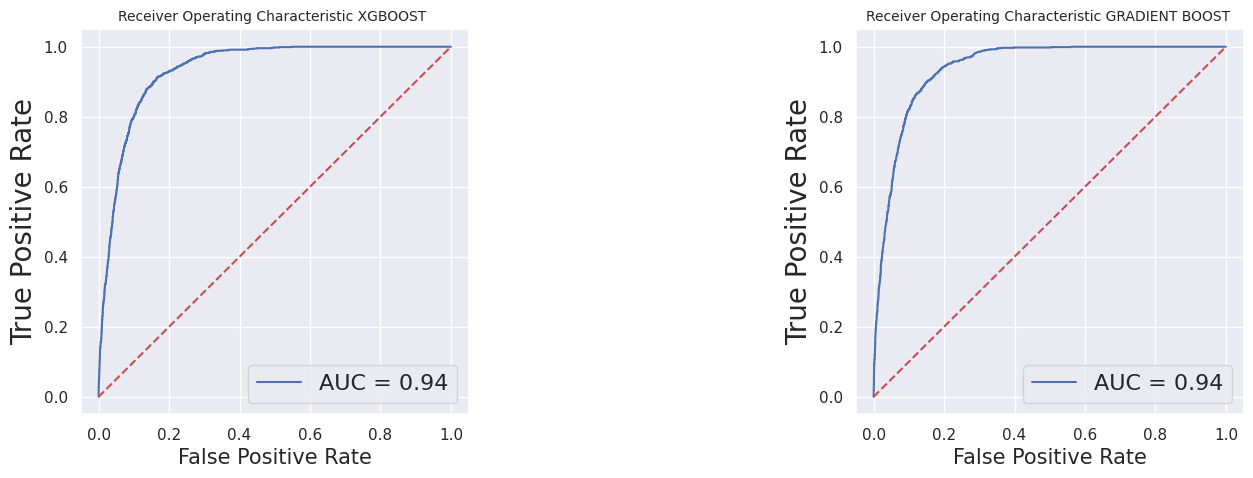

In [ ]:
# XGBOOST ROC/ AUC , BEST MODEL
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

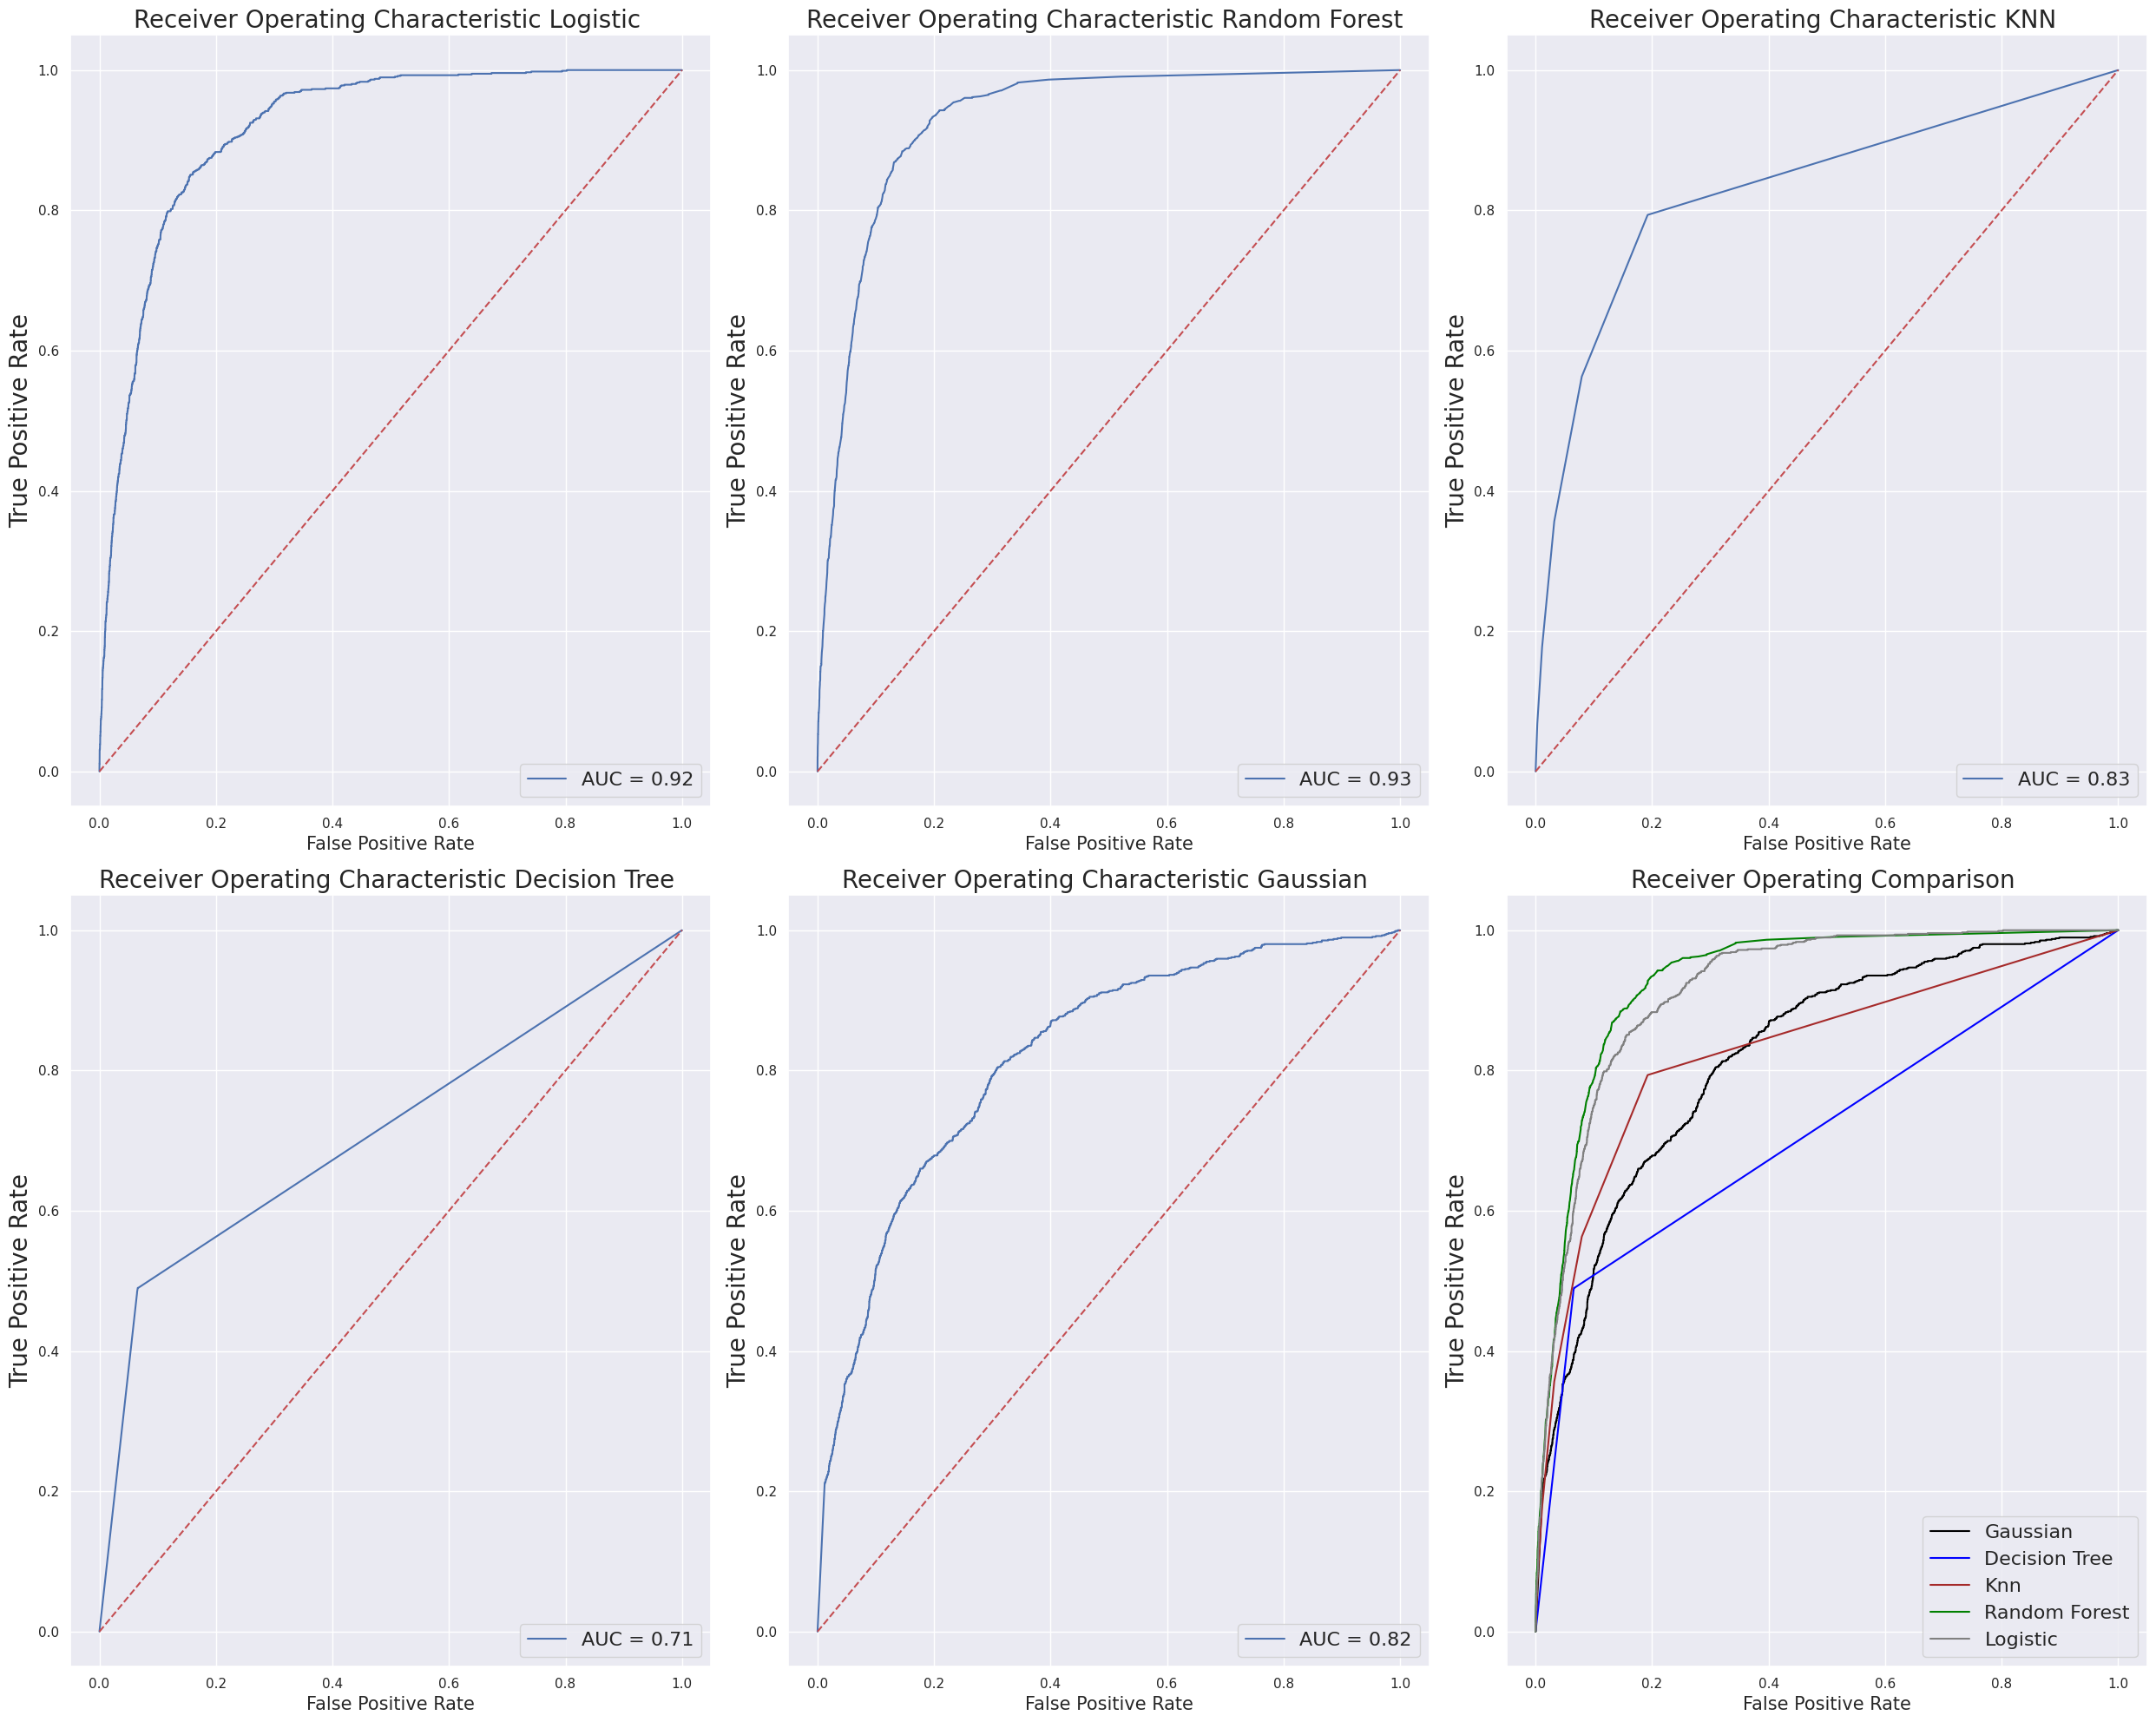

In [ ]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (25,20))

#-------------------- LOGMODEL --------------------
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#-------------------- RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#-------------------- KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#-------------------- DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#-------------------- GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#-------------------- ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout()

ANALYZING THE **RESULTS**

we have to decide which one is the best model, and we have two types of wrong values:

* False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did.
* False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont.
* The first one its most harmful, because we think that we already have that client but we dont and maybe we lost him in other future campaings
* The second its not good but its ok, we have that client and in the future we'll identify that in truth he's already our client

our objective here, is to find the best model by confusion matrix with the lowest False Positive as possible.**bold text**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

In [ ]:
print('KNN Confusion Matrix\n', confusion_matrix(y_test, knnpred),end='\n\n')
print('KNN Reports\n',classification_report(y_test, knnpred))

KNN Confusion Matrix
 [[7046  233]
 [ 617  342]]

KNN Reports
               precision    recall  f1-score   support

       False       0.92      0.97      0.94      7279
        True       0.59      0.36      0.45       959

    accuracy                           0.90      8238
   macro avg       0.76      0.66      0.69      8238
weighted avg       0.88      0.90      0.89      8238



In [ ]:
print('SVC Confusion Matrix\n', confusion_matrix(y_test, svcpred),end='\n\n')
print('SVC Reports\n',classification_report(y_test, svcpred))

SVC Confusion Matrix
 [[6778  501]
 [ 646  313]]

SVC Reports
               precision    recall  f1-score   support

       False       0.91      0.93      0.92      7279
        True       0.38      0.33      0.35       959

    accuracy                           0.86      8238
   macro avg       0.65      0.63      0.64      8238
weighted avg       0.85      0.86      0.86      8238



In [ ]:
print('Decision Tree Confusion Matrix\n', confusion_matrix(y_test, dtreepred),end='\n\n')
print('Decision Tree Reports\n',classification_report(y_test, dtreepred))

Decision Tree Confusion Matrix
 [[6809  470]
 [ 495  464]]

Decision Tree Reports
               precision    recall  f1-score   support

       False       0.93      0.94      0.93      7279
        True       0.50      0.48      0.49       959

    accuracy                           0.88      8238
   macro avg       0.71      0.71      0.71      8238
weighted avg       0.88      0.88      0.88      8238



In [ ]:
print('Random Forest Confusion Matrix\n', confusion_matrix(y_test, rfcpred),end='\n\n')
print('Random Forest Reports\n',classification_report(y_test, rfcpred))

Random Forest Confusion Matrix
 [[6997  282]
 [ 512  447]]

Random Forest Reports
               precision    recall  f1-score   support

       False       0.93      0.96      0.95      7279
        True       0.61      0.47      0.53       959

    accuracy                           0.90      8238
   macro avg       0.77      0.71      0.74      8238
weighted avg       0.89      0.90      0.90      8238



In [ ]:
print('Gaussian Confusion Matrix\n', confusion_matrix(y_test, gaussiannbpred),end='\n\n')
print('Gaussian Forest Reports\n',classification_report(y_test, gaussiannbpred))

Gaussian Confusion Matrix
 [[6451  828]
 [ 433  526]]

Gaussian Forest Reports
               precision    recall  f1-score   support

       False       0.94      0.89      0.91      7279
        True       0.39      0.55      0.45       959

    accuracy                           0.85      8238
   macro avg       0.66      0.72      0.68      8238
weighted avg       0.87      0.85      0.86      8238



In [ ]:
print('Xgboost Confusion Matrix\n', confusion_matrix(y_test, xgbprd),end='\n\n')
print('Xgboost Forest Reports\n',classification_report(y_test, xgbprd))

Xgboost Confusion Matrix
 [[6990  289]
 [ 472  487]]

Xgboost Forest Reports
               precision    recall  f1-score   support

       False       0.94      0.96      0.95      7279
        True       0.63      0.51      0.56       959

    accuracy                           0.91      8238
   macro avg       0.78      0.73      0.75      8238
weighted avg       0.90      0.91      0.90      8238



In [ ]:
print('Gradient Boosting Confusion Matrix\n', confusion_matrix(y_test, gbkpred),end='\n\n')
print('Gradient Boosting Reports\n',classification_report(y_test, gbkpred))

Gradient Boosting Confusion Matrix
 [[7023  256]
 [ 487  472]]

Gradient Boosting Reports
               precision    recall  f1-score   support

       False       0.94      0.96      0.95      7279
        True       0.65      0.49      0.56       959

    accuracy                           0.91      8238
   macro avg       0.79      0.73      0.75      8238
weighted avg       0.90      0.91      0.90      8238



**Conclusion** :

After the analysis we see that our interest is over decreasing the False Negative means the client SUBSCRIBED to term deposit, but the model said he dont which indicates RECALL. So, we conclude that the model with high RECALL would be best suited for the problem statement.

In [ ]:
pd.DataFrame(data = [recall_score(y_test,logpred, average='weighted'),
recall_score(y_test,knnpred, average='weighted'),
recall_score(y_test,svcpred, average='weighted'),
recall_score(y_test,dtreepred, average='weighted'),
recall_score(y_test,rfcpred, average='weighted'),
recall_score(y_test,gaussiannbpred, average='weighted'),
recall_score(y_test,xgbprd, average='weighted'),
recall_score(y_test,gbkpred, average='weighted')],index=['Logistic','KNN','SVC','DT','RF','NB','XG','GB'],
            columns=['Recall Score']).sort_values(by='Recall Score',ascending=False)

Recall Score
GB            0.909808
XG            0.907623
Logistic      0.903739
RF            0.903617
KNN           0.896820
DT            0.882860
SVC           0.860767
NB            0.846929

Task3:-Suggestions to the Bank market team to make  customers  buy the product.

Strategic Suggestions for Enhancing Term Deposit Subscription Rates

Optimize Customer Engagement:

Targeted Communication Strategies:

Personalization: Utilize insights from the predictive model to personalize communication based on customer profiles (e.g., job type, age). Tailored messages resonate better and can significantly increase engagement rates.
Optimal Timing: Leverage findings from the model about the best months and days for contacting customers. Prioritize outreach during times with historically higher engagement and success rates, such as March and October.
Enhanced Customer Segmentation:

Behavioral Segmentation: Segment customers not only based on demographic data but also their past interactions and responses to campaigns. This allows for more nuanced approaches and can target individuals more likely to respond positively.
Predictive Analytics: Continue refining the use of predictive analytics to anticipate customer needs and behavioral trends. This proactive approach can help in crafting offers that are more likely to be accepted.
Improve Campaign Efficiency:

Resource Allocation:

Focus on High-Probability Leads: Use the model's predictions to prioritize customers with a higher likelihood of subscription. Concentrating resources on these prospects can increase conversion rates and reduce marketing costs.
Dynamic Adjustment of Strategies: Implement a feedback loop where campaign results continually inform and adjust the predictive model. This dynamic approach ensures strategies remain relevant and effective over time.
Enhanced Training and Development:

Data Literacy: Invest in training for marketing teams to enhance their understanding of data-driven insights and model outputs. A higher level of data literacy can improve decision-making and strategic planning.
Continuous Learning: Encourage ongoing learning and adaptation of new analytical methods and technologies that can further enhance predictive accuracy and campaign effectiveness.
Strengthen Customer Relationships:

Trust and Transparency:

Clear Communication: Be transparent about how customer data is used for marketing purposes. Customers who trust how their data is handled are more likely to respond positively to campaigns.
Engagement Programs: Develop loyalty programs or workshops that educate customers about financial planning and the benefits of term deposits. These initiatives can strengthen customer relationships and improve long-term engagement.
Feedback Mechanisms:

Customer Feedback: Regularly collect feedback through surveys or interactive platforms to gauge customer satisfaction with the bank's services and communication approaches. Use this feedback to refine future campaigns.
Analytical Reviews: Periodically review the performance of different campaign strategies to identify what works best. This should include analyzing customer segments that showed improvements or declines in engagement to continuously refine targeting strategies.
By implementing these strategic suggestions, the bank can not only enhance the effectiveness of its term deposit marketing campaigns but also foster stronger, more trusting relationships with its customers. These strategies ensure that the bank remains adaptable, customer-centric, and competitively positioned to respond to changing market conditions and customer needs.

**Model Comparison Report**

Create a report stating the performance of multiple models on this data and suggest the best model for production.






#  Model Comparison Report — Portuguese Bank Marketing Dataset

This report compares multiple machine learning models built to predict whether a customer will subscribe to a **term deposit**.

##  **Models Evaluated**

The notebook contains results for:

* Logistic Regression
* K-Nearest Neighbors (KNN)
* Support Vector Classifier (SVC)
* Decision Tree
* Random Forest
* Gaussian Naive Bayes
* XGBoost
* Gradient Boosting



#  Summary of Extracted Metrics

Below is a consolidated summary based on the notebook outputs.

| Model                    | Accuracy      | Notes                                        |
| ------------------------ | ------------- | -------------------------------------------- |
| **Logistic Regression**  | **0.917**     | Highest accuracy among basic models          |
| **KNN**                  | 0.908         | Good but lower recall                        |
| **SVC**                  | 0.860         | Performs worse than others                   |
| **Decision Tree**        | 0.880         | Risk of overfitting                          |
| **Random Forest**        | **0.90**      | Strong and stable                            |
| **Gaussian Naive Bayes** | ~0.87         | Lower performance due to feature assumptions |
| **XGBoost**              | **0.90–0.91** | High recall and F1                           |
| **Gradient Boosting**    | **0.90–0.91** | Best recall score (≈ 0.91)                   |



#  Key Insights from the Confusion Matrices & Reports

###  Logistic Regression

* Accuracy: **~91.7%**
* Balanced performance
* Good for a baseline
* Interpretable model



###  Random Forest

* Accuracy: **~90%**
* Good precision & recall
* Handles categorical data & non-linear patterns



###  XGBoost

* Accuracy: **0.90–0.91**
* Weighted Avg F1 ≈ **0.90**
* Improves recall for positive class (“yes”)
* Excellent for tabular data



###  Gradient Boosting

* Accuracy: **~0.91**
* **Highest recall: 0.9098** (from summary table)
* Best for reducing false negatives (important in marketing)



#  Best Model for Production

### Recommended Model: Gradient Boosting (or XGBoost)

Based on:

✔ High accuracy (~0.91)
✔ Best recall (~0.91) – crucial for identifying customers likely to subscribe
✔ Balanced F1 score
✔ Less overfitting vs Decision Tree
✔ Better positive-class performance vs Logistic Regression

Marketing campaigns need **high recall** to avoid missing potential buyers — Gradient Boosting performs the best here.



# Final Recommendation

### **Deploy Gradient Boosting as the primary model**

Optionally,

* Keep **Logistic Regression** as a lightweight fallback model.
* Use **XGBoost** when dataset size or class imbalance increases.




**Report on Challenges faced**

Create a report which should include challenges you faced on data and what technique used with proper reason.

Note:-All above tasks have to be done on a single jupyter notebook and share the same for the final submission.


**Introduction**: This report outlines the key challenges encountered during the development and deployment of predictive models aimed at enhancing the marketing strategies for term deposit subscriptions at a Portuguese bank. The analysis involved models such as LightGBM, RandomForest, XGBoost, and GradientBoosting, chosen for their advanced capabilities in handling complex datasets.

Overview of Challenges:

1.Data Imbalance: In the development of predictive models for term deposit subscription at a Portuguese bank, several significant challenges were encountered, which required integrated strategies for effective resolution. A predominant issue was the data imbalance, where the number of non-subscribers substantially outnumbered subscribers, leading to models biased towards predicting the majority class. To counteract this, techniques such as adjusting class weights in RandomForest and using the is_unbalance option in LightGBM were employed, which helped in giving more importance to the minority class during training.

2.Feature Selection and Engineering: Feature selection and engineering also presented a hurdle as the dataset contained a diverse range of variables, affecting the models’ performance due to overfitting or underfitting if not handled properly. Through extensive feature engineering, including encoding categorical variables and utilizing feature importance analysis specific to each model, the most impactful predictors were retained, enhancing model accuracy and generalizability.

3.Multicollinearity: Multicollinearity among economic indicators such as emp.var.rate, euribor3m, and nr.employed was another challenge that could potentially distort model estimates and sensitivity. This was mitigated by employing tree-based models known for their robustness against multicollinearity and conducting variance inflation factor (VIF) analysis to guide the inclusion of features.

4.Model Complexity and Training, tuning Time: Model complexity and prolonged training times, especially evident in models like GradientBoosting, posed practical limitations in rapidly changing market conditions. Optimizing model parameters to balance complexity with performance, particularly focusing on more efficient models like LightGBM, facilitated quicker training and deployment.

5.Overfitting: Finally, initial iterations of the models showed tendencies of overfitting, where they performed exceptionally well on training data but poorly on unseen test data. Implementing cross-validation, regularization of model parameters, and subsampling techniques helped in reducing overfitting, ensuring the models maintained their predictive power on new, unseen datasets.

Conclusion: Addressing these challenges required a blend of advanced analytical techniques and strategic decision-making to ensure that the predictive models not only perform well statistically but also align with the practical marketing needs of the bank. The resolutions implemented have significantly enhanced the models' robustness, making them valuable tools for identifying potential subscribers and optimizing marketing resources effectively. This report serves as a foundation for future projects, providing insights into overcoming similar challenges in predictive modeling within the financial sector.

